# SUPPORT VECTOR MACHINE :- CLASSIFICATION TASK.

## Business Case:-
### To find out based on given features whether the loan will get approved or not

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
## loading the data
data=pd.read_csv('loan_approved.csv')

## Domian analysis.
- **Loan ID**:-This is a redundant feature which bears the number of the loan the applicant has applied for. 
- **Gender:-** According to a research done by IDB's Research Department, they found out that in Latin America and the Caribbean, as in much of the world, women are less likely to be paid an equal wage or to be approved for a loan. They found out that even with identical requests, women were nearly 18% less likely to have their loan applications approved than men. We also estimated that the median forgone profit associated with applications rejected due to gender discrimination amounted to US\\$1,785, or 23% of the median loan size (approximately US\\$7,500). The whole research can be found here:https://publications.iadb.org/en/bad-taste-gender-discrimination-in-the-consumer-credit-market
- **Married:-** When it comes to qualifying for a loan, it doesn't matter if you're applying as a married couple or as two unmarried individuals, because the loan terms and approval criteria are the same. The likelihood of being approved for the loan depends on income, credit and assets—not marital status. However, for mortgages, when you apply for a loan as a couple, the lender uses the lower of the two credit scores. If your spouse has bad credit, you may not be able to qualify for the loan you want.
- **Dependents**:- Dependants are those people or children who depend on the person borrowing the loan. Children are a gift but they can also be a serious drag on your borrowing power. Most lenders use the Household Expenditure Method (HEM) to calculate your living expenses. You’ll also have to provide an estimate of your living expenses. This is to determine whether you’re above or below the average cost of living. The bank will use whichever one is higher to calculate your borrowing power. Since having dependents negatively affects your borrowing power, you’ll need to be careful when estimating your living expenses. The minimum living expenses for large families can vary from lender to lender. However, living expenses increase with each additional person in the household in most cases. *It should be noted that some lenders cap living expenses at a certain amount. This favours larger families quite a bit so applying with the right lender is key.*
- **Education**: Here we have graduate and not graduate. A graduate is a person who has successfully completed a course of study or training, especially a person who has been awarded an undergraduate or first academic degree.
- **Self-employed**:- This means working for oneself as a freelance or the owner of a business rather than for an employer. There are no extra requirements for self-employed mortgage loans. The client is held to the same standards for credit, debt, down payment, and income as other applicants. The part that can be tough is when documenting the income. Proving your cash flow as a business owner, contractor, freelancer, or gig worker can require more paperwork than for an employees since some lenders may require a cashflow for a certain period of time for example 2 years.
- **Applicant income**:- This is the amount of earnings made by the applicant. While the income doesn't directly affect credit score, it does play an important role when one applys for credit. Earning more income and/or paying off debts improves ones chances of being approved for a loan.
- **Coapplicant income**:- Also known as a co-borrower on a mortgage or loan application, a co-applicant is a person who applies for a loan with you as someone who is equally responsible. Most commonly, spouses or domestic partners are co-borrowers since they’ll want equal stake in the ownership of the property. However, anyone can be a co-borrower as long as they meet the lender’s requirements.With a co-borrower, both parties’ credit and income are equally evaluated in order to approve the credit being applied for.
- **Loan amount**:- The loan amount is the money you borrow to buy the home. Many lenders also consider how much money one is applying for when they’re deciding whether or not to approve your application. The more money one needs to borrow, the higher the monthly payments will likely be and the more interest one will be charged. A high monthly payment gives one less wiggle room in their budget, and while one can sometimes opt for a longer repayment term, that also means they will be paying more in interest charges over the life of the loan.
- **Loan amount term**:- "Loan terms"  is a broad way to describe the various details of a loan, including the repayment period, monthly payments, and costs. When applying for a loan, the lender should specify what the loan terms are before finalizing any borrowing agreement. In this dataset the terms are in terms of loan repayment period.
- **Credit history**:- Credit history is information about your loans. It covers loans such as mortgages, credit cards, overdrafts, hire purchase agreements and personal contract plans. Credit history includes details such as the amount of the loan, the outstanding amount and any missed payments. This information is listed in a credit report. Credit reports are available for lenders (such as banks and credit unions) to consult when they are considering applications for loans. Not every one has credit history, however, having no credit history doesn't mean you have never paid any bills. It just means that none of your bills or expenses have been reported to the credit bureaus. You might have no credit history if you have never had a credit card or if you're someone who prefers to pay for everything from homes to cars with cash. Bad credit 
- **Property area**:- Lenders highly consider the type of property against which a loan has been applied. The lenders have surveyors who survey the property to check its type (whether residential or commercial), age, location and value in the current market. Based on the reports submitted by the surveyors, the lenders decide on the amount of loan that can be approved, the tenure of the loan repayment, and the rate of interest that can be offered to the borrower. Commercial properties and residential properties will have different loan amount eligibility and varied rates of interest. An old and worn-out building will have less property value and may result in getting a lower amount of loan approved and a higher rate of interest with a short repayment period. Whereas, a high-value property located in an upmarket area may result in getting the borrower a higher loan value with a much lower rate of interest. 
- **Loan status (Approved)**:- This is the target feature which tells us whether the loan was approved or not. 

## Basic Checks

In [3]:
## Getting the first few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
## Getting the last 5 rows of data
data.tail(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Getting the basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
## Getting the statistical information of data (Numeric columns)
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
## Getting the description of data (Categorical columns)
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
# Checking if there are duplicates in the dataset
data.duplicated().sum()

0

### Insights from basic checks:
- We have 614 observations with 13 features. 8 are objects, 4 are float64 and  1 is of datatype int64. The entire dataset occupies above 62.5 Kilobytes.
- It appears that we have some missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History. All these should be cleaned for better analysis.
- Credit History seems to be a discrete data with 0 and 1.
- The minimum income amount of the loan applicant seems to be 150.
- There seems to be no duplicated observations.

## Exploratory Data Analysis

In [ ]:
# Univariate analysis
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

### Insights from the Univariate analysis using sweetviz
>**Gender**:- 80% of the observations in the dataset are male while the rest (20%) is female. We have 13 values (2%) missing.

>**Married**:- About 65% of the people in dataset are  married while the rest that is 35% are not marrried. 

>**Dependents**:- Here we have 4 classes or categories of people. those without children/pople who depend on them (labeled as 0) seem to be 56% of the total observations those with 1 child/dependant and 2 children/dependants, are same occupying 15% of the entire dataset and lastly those with 3 dependants or children  10%. We have 15%. Only 3 values are missing in this column.

>**Education**:- Graduates cover 78% of the entire dataset, the remaining are not graduates. No missing values.

>**Self_Employment**:- Only about 18% of the clients i the dataset are self employed. 32 (5%) values are missing. 

>**ApplicantIncome**:- This follows are normal distribution but negatively skewed. A majority of clients in the dataset earn less than 20K with 75% earning less than 15k. However, there seems to be some which earn about 40k. No missing values.

>**CoapplicantIncome**:- The distribution follows a normal distribution again with a negative skew. Many of the coapplicants have their income less than 10k with 95% aerning less than 5k. No missing values.

>**LoanAmmount**:- Again negatively skewed normal distribution is the distribution of this fearture of the dataset. The majority of the clients seem to have their loan amount not beyond 300. 22 values (4% of the data) are missing.

>**Loan_Amount_Term**:- A majority seem to have a loan term of 360. 14 values (2% of the data) are missing.

>**Credit_History**:- There seems to be 2 categories, 0 and 1. 1 means they have credit history while 0 do not have credit history. About 82%  of the clients have credit history. 50 values (8% of the data) are missing.

>**Propert_Area**:- There are 3 areas in which the property for which the loan is to be approved. Rural area, Urban area and Semiurban area. The latter, occupies about 40% of the data, Urban follows with about 32% and the least is Rural with about 28%. No missing vaues.

>**Loan_Status (Approved)**:- About 70% of the loans are approved (Y) while 30% are not approved (N). No missing values in the data.

In [9]:
## Bivariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# Creating nummerical and categorical data frames
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [11]:
# Checking the categorical data
data1.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban


In [12]:
# Checking numerical data
data2.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0


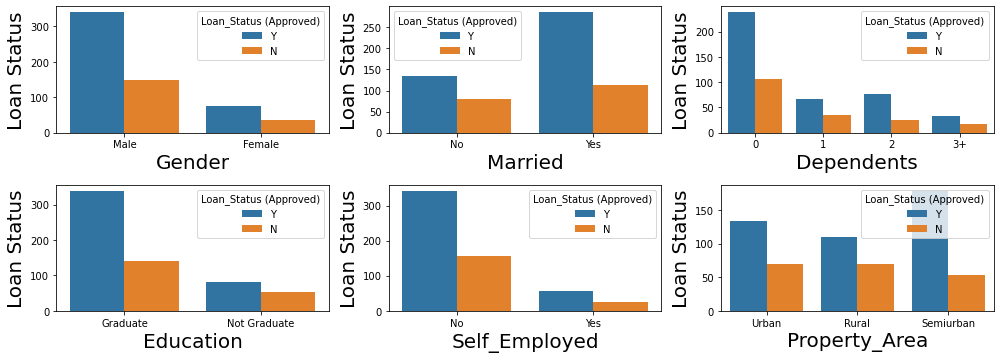

In [13]:
# Plotting countplot for the categorical data in comparison to the target variable (Loan status)
plt.figure(figsize=(14,7), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column],hue=data['Loan_Status (Approved)'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Insights from bivariate analysis of categorical data
- Gender:-It appears that Men have a higher chance of getting their loans approved as compared to female. As discussed in the domain analysis, this is expected due to many factors such as discrimination, family roles where male are seen as the head of the families and thus having the borrowing power among others. In the male category, more men have their loans approved  while in female, it appears that they have almost equal chances of both approval or disapproval.
- Married:- Here it appears that those who are married have higher chances of their loans being approved. This could be because married people have many valid reasons for applying loans as well as the fact that they pull together all their resources and hence have a higher borrowing power. 
- Dependants:- Generally speaking, the trend shows that the more the number of dependants the lesser the chance of getting the loan approved. This is because having dependents means you have higher commitments, which in turn lower your disposable income. Lenders will take a note of this when you apply for  loan since it affects your living expenses and hence affect the ability to pay back. However, in each category, we have more clients receiving loan approvals.
- Graduate:- It appears that graduates have a higher chance of loan approval as compared to non graduates. The reason for this could be because getting a college degree is thought of as paying enormous dividends, and not just in career earnings. According to Forbes News, colleges are important social sorters, they provide valuable peer networks and are invaluable maturity accelerators. see: https://www.forbes.com/sites/dereknewton/2020/01/25/a-college-degree-can-now-help-you-get-a-loan/?sh=3afd9a511f9a.
- Self_Employed:- From the plot above, it is clear that the self employed category has less chance of loan approval as compared to the other class. This could be because of the conditions on which self employed must meet for loan approval such as being operational for a given period of time for example 2 years. The income information given must also be on the taxable income which may not be the case for the self employed. Many risks come with enterprenuership such as the fact that while they enjoy profits alone, they also enjoy losses alone. This risk alone may lessen the chance for loan approval.
- Property_Area:- It appears that semi-urban has more loan approval as compared to other property areas. This could be because as such areas blend a compromise of many factors such as  cost and other factors considered for estates/homesteads. Rural may not offer good employment opportunities while urban ceters have many employment opportunities, they may not provide good places for dwelling in. 

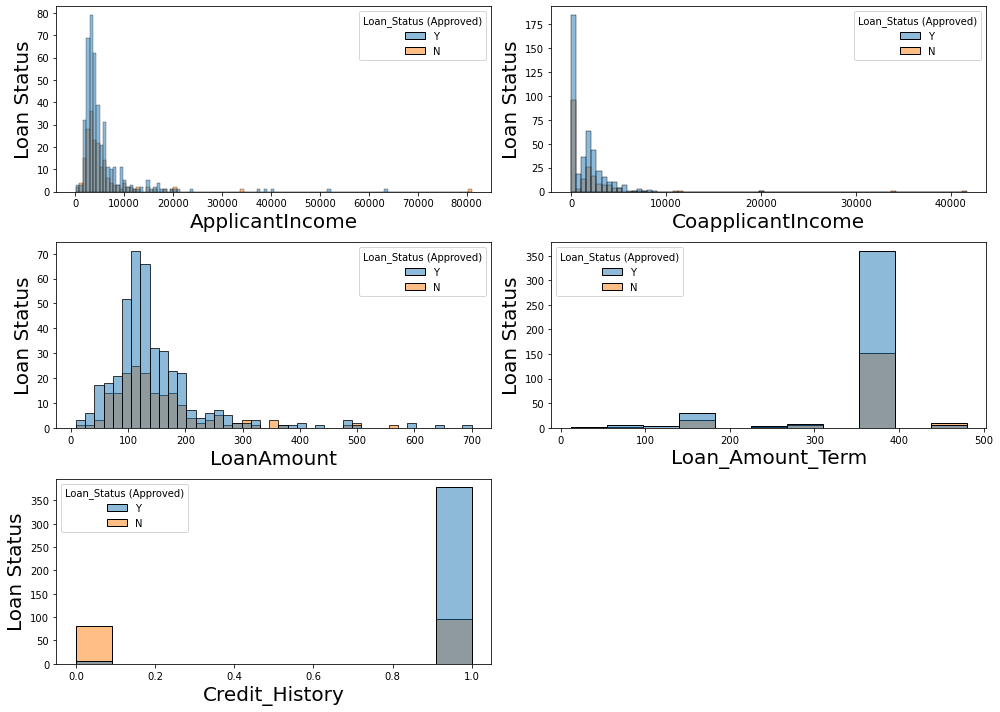

In [14]:
# Plotting histogram for the numerical columns in comparisonn to the loan status
plt.figure(figsize=(14,10), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=data2[column],hue=data['Loan_Status (Approved)'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Insights from bivariate analysis of numerical columns
- ApplicantIncome:- It appear that Income status of the applicant does not show any direct relationship with loan approval since for any given amount of income we have both loan approval and disapproval. However at every amount of income the loan has a higher chance of approval as compared to loan disapproval except for the observation about 80,000 where the loan is disapproved. This same trend applies for the **CoappliantIncome, LoanAmount, and Loan_Amount_Term features too.**
- Credit_Histoty: -Here we see that for those without credit history, the chance of loan diaspproval is more. For those with credit history, the chances of loan approval is higher. This could be because with loan credit, the bank has more information on your history in transactions and hence they have more confidence in you based on your track records in terms of paying bills and other debts.


## Data Preprocessing Pipeline
- For many preprocessing technique, creating a deep copy would be well at this point. 

In [117]:
# Creating a copy to be used for the second prerocesing
data_copy=data.copy()

In [16]:
## Checking missing values
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [17]:
#Cheking the shape of the dataset
data.shape

(614, 13)

> ### Step 1 Dealing with missing values

In [18]:
## Getting the rows where values are missed in Gender features
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [19]:
## Checking the distribution along the both labels
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
## The percentage of the missing values
perc_mis=data.Gender.isnull().sum()/len(data)
print(f'We have {perc_mis:.1%} of the data missing. This should be imputed.' )

We have 2.1% of the data missing. This should be imputed.


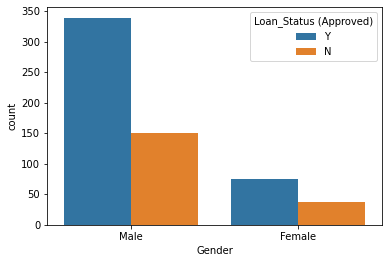

In [21]:
# Distribution of Gender
sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=data);

In [22]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [23]:
# Confirming the imputation
data.Gender.isnull().sum()

0

In [24]:
## Getting the values in Dependents
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


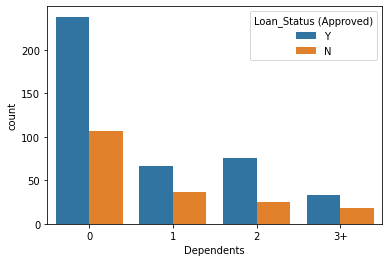

In [25]:
# Plot to show the distribution of the dependants effect on loan status
sns.countplot(x='Dependents',data=data,hue='Loan_Status (Approved)');

In [26]:
# From the graphical representation it can be seen that as the number of dependents 
#getting increased,
# the chances of approval is less, since we have missing values and if we approve
# loan for them
# it can turn into huge loss(high chance).Hence we will substitue missing values
#by 3+.
data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [27]:
pd.crosstab(data['Loan_Status (Approved)'],data.Dependents)

Dependents,0,1,2,3+
Loan_Status (Approved),,,,
N,107,36,25,24
Y,238,66,76,42


In [28]:
## renaming the target column
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [29]:
# Randomly sample the data
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
220,LP001736,Male,Yes,0,Graduate,No,2221,0.0,60.0,360.0,0.0,Urban,N
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
556,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban,Y


In [30]:
## For married feature
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,3+,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,3+,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,3+,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


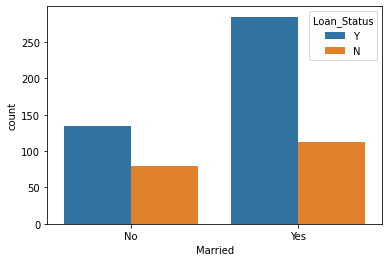

In [31]:
# Plotting the married distribution 
sns.countplot(x='Married',hue='Loan_Status',data=data);

In [32]:
## getting the counts
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

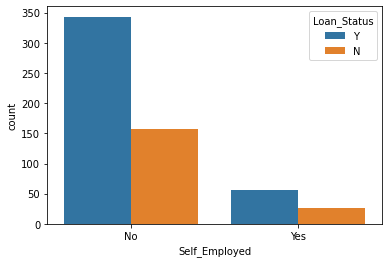

In [34]:
# Plotting the self employment distribution
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data);

In [35]:
pd.crosstab(data.Self_Employed,data.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [36]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [37]:
## Checking Self_Employed
data.loc[data['Self_Employed'].isnull()==True].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N


In [38]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [39]:
# check for null values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

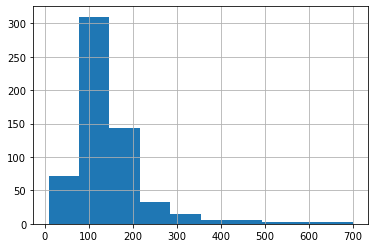

In [40]:
## Histogram since it has numerical value
data.LoanAmount.hist()
plt.show()

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [41]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [42]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [43]:
# Confirming the imputation
data.LoanAmount.isnull().sum()

0

In [44]:
## Laon amount term
data.Loan_Amount_Term.isnull().sum()

14

In [45]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

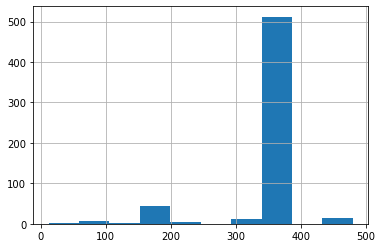

In [46]:
data.Loan_Amount_Term.hist();

In [47]:
# Gettig the median of the loan term since it is skewed
np.median(data.Loan_Amount_Term.dropna(axis=0))

360.0

In [48]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [49]:
# Credit_History
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

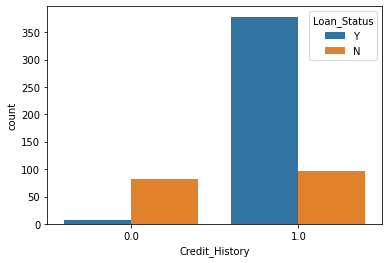

In [50]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status');

In [51]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [52]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

>### Step 2 Handling the categorical data


In [53]:
## One hot encoding
# Gender
df1=pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [54]:
## One hot encoding
# Married
df1=pd.get_dummies(data['Married'],prefix='Married',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Married'],axis=1)

In [55]:
## One hot encoding
# Education
df1=pd.get_dummies(data['Education'],prefix='Education',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Education'],axis=1)

In [56]:
## One hot encoding
# Property area
df1=pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Property_Area'],axis=1)

In [57]:
## One hot encoding
# Dependents
df1=pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Dependents'],axis=1)

In [59]:
## One hot encoding
# Self employed
df1=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Self_Employed'],axis=1)

KeyError: 'Self_Employed'

In [60]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


All our features are now numeric except the target feature.

## Feature Engineering:

>### Step 3 Dealing with Numerical category
- Scaling

In [61]:
# Scalling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [62]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,342.410423,0.773616,0.817590,0.653094,0.218241,0.379479,0.328990,0.166124,0.164495,0.107492,0.133550
std,0.075560,0.070229,0.121718,64.428629,0.418832,0.386497,0.476373,0.413389,0.485653,0.470229,0.372495,0.371027,0.309990,0.340446
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.045300,0.028524,0.172214,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.069821,0.055134,0.225398,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
#Outlier check -->Once we see the performance of classifier on that basis we will check for outlier.

In [64]:
## checking the duplicate rows
data.duplicated().sum()

0

In [65]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv',index=False)

In [66]:
# loading data
preprocessed_data=pd.read_csv('Preprocessed_data.csv')

In [67]:
preprocessed_data.head(1)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,0.070489,0.0,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


## Feature Selection

In [68]:
# Removing redundant columns
#We can drop loan id.
l1=['Loan_ID']
preprocessed_data.drop(l1,axis=1,inplace=True)

In [69]:
# Confirming
preprocessed_data.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.0,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


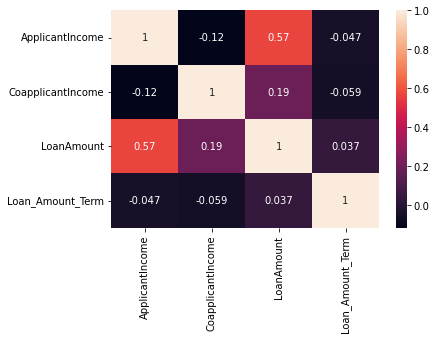

In [70]:
## checking correlation
corr_data=preprocessed_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
sns.heatmap(corr_data.corr(),annot=True);

In [71]:
## There is no relationship among the numerical data 

## Model Creation

In [72]:
preprocessed_data.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.0,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [73]:
# Renaming values for the target column
preprocessed_data['Loan_Status']=preprocessed_data['Loan_Status'].map({'Y':1,'N':0})
preprocessed_data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [74]:
# Creating the variables
## defining X and y
X=preprocessed_data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Self_Employed_Yes']]
y=preprocessed_data['Loan_Status']

In [75]:
y.unique()

array([1, 0], dtype=int64)

In [76]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0


In [77]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [78]:
## balancing the data
preprocessed_data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [80]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [81]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [82]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [83]:
# Predict output for X_test
y_pred=svclassifier.predict(X_test)

In [84]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.7922077922077922

In [85]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

Default_class_rep=classification_report(y_test,y_pred)
print(Default_class_rep)

              precision    recall  f1-score   support

           0       0.67      0.06      0.11        33
           1       0.79      0.99      0.88       121

    accuracy                           0.79       154
   macro avg       0.73      0.53      0.50       154
weighted avg       0.77      0.79      0.72       154



In [86]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_pred)
f1

0.8823529411764707

In [87]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,2,31
1,1,120


In [88]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
DefaultCV=scores.mean()
print("Cross validation Score:",DefaultCV)
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.8150289  0.8150289  0.81395349]
Cross validation Score: 0.8146704306134337
Std : 0.0005069547205710685


In [89]:
DefaultCV

0.8146704306134337

### Insights from the model created
 Our model has a fair accuracy of 0.79. However, it appears that it is bias towards estimating class 1 (Loan approved) but does poorly on class 0 (Loan disapproved) since this can lead to a huge loss. Therefore we need to tune our hyperparameters in order to improve the performance of the model.

### Hyperparameter tuning phase 1

In [90]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}

model1=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model1, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 475 candidates, totalling 2375 fits
[CV 1/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=1;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=2;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=3;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state

[CV 5/5] END ..C=0.1, gamma=0.1, random_state=2;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=5;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=

[CV 2/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.816 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.817 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.816 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.817 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0

[CV 4/5] END C=0.1, gamma=0.001, random_state=5;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, random_state=5;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, random_state=6;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, random_state=6;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, random_state=6;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, random_state=6;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, random_state=6;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, random_state=7;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, random_state=7;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, random_state=7;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, random_state=7;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, random_state=7;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.

[CV 1/5] END C=0.1, gamma=0.0001, random_state=7;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, random_state=7;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, random_state=7;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, random_state=7;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, random_state=7;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.817 total time=   0.0s
[CV 3/5] END C=0

[CV 3/5] END ......C=1, gamma=1, random_state=8;, score=0.811 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, random_state=8;, score=0.833 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, random_state=8;, score=0.835 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, random_state=9;, score=0.865 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, random_state=9;, score=0.813 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, random_state=9;, score=0.811 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, random_state=9;, score=0.833 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, random_state=9;, score=0.835 total time=   0.0s
[CV 1/5] END .....C=1, gamma=1, random_state=10;, score=0.865 total time=   0.0s
[CV 2/5] END .....C=1, gamma=1, random_state=10;, score=0.813 total time=   0.0s
[CV 3/5] END .....C=1, gamma=1, random_state=10;, score=0.811 total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, random_state=10;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=1, gamma

[CV 3/5] END ...C=1, gamma=0.1, random_state=10;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, random_state=10;, score=0.856 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, random_state=10;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.1, random_state=11;, score=0.868 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, random_state=11;, score=0.815 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, random_state=11;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, random_state=11;, score=0.856 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, random_state=11;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.1, random_state=12;, score=0.868 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, random_state=12;, score=0.815 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, random_state=12;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, random_state=12;, score=0.856 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0

[CV 1/5] END ..C=1, gamma=0.01, random_state=12;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=12;, score=0.808 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.01, random_state=12;, score=0.816 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, random_state=12;, score=0.816 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, random_state=12;, score=0.812 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, random_state=13;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=13;, score=0.808 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.01, random_state=13;, score=0.816 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, random_state=13;, score=0.816 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, random_state=13;, score=0.812 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, random_state=14;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=14;, score=0.808 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.

[CV 1/5] END .C=1, gamma=0.001, random_state=14;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, random_state=14;, score=0.808 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.001, random_state=14;, score=0.812 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, random_state=14;, score=0.816 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, random_state=14;, score=0.808 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, random_state=15;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, random_state=15;, score=0.808 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.001, random_state=15;, score=0.812 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, random_state=15;, score=0.816 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, random_state=15;, score=0.808 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, random_state=16;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, random_state=16;, score=0.808 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.0

[CV 5/5] END C=1, gamma=0.0001, random_state=15;, score=0.808 total time=   0.1s
[CV 1/5] END C=1, gamma=0.0001, random_state=16;, score=0.816 total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, random_state=16;, score=0.808 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, random_state=16;, score=0.812 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, random_state=16;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, random_state=16;, score=0.808 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, random_state=17;, score=0.816 total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, random_state=17;, score=0.808 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, random_state=17;, score=0.812 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, random_state=17;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, random_state=17;, score=0.808 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, random_state=18;, score=0.816 total time=   0.0s
[CV 2/5] END C=1, gamma=0.00

[CV 3/5] END ....C=10, gamma=1, random_state=17;, score=0.827 total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, random_state=17;, score=0.793 total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, random_state=17;, score=0.813 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, random_state=18;, score=0.840 total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, random_state=18;, score=0.806 total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, random_state=18;, score=0.827 total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, random_state=18;, score=0.793 total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, random_state=18;, score=0.813 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, random_state=19;, score=0.840 total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, random_state=19;, score=0.806 total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, random_state=19;, score=0.827 total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, random_state=19;, score=0.793 total time=   0.0s
[CV 5/5] END ....C=10, gamma

[CV 1/5] END ..C=10, gamma=0.1, random_state=19;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.1, random_state=19;, score=0.826 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.1, random_state=19;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.1, random_state=19;, score=0.849 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.1, random_state=19;, score=0.846 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, random_state=1;, score=0.868 total time=   0.1s
[CV 2/5] END ..C=10, gamma=0.01, random_state=1;, score=0.809 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.01, random_state=1;, score=0.824 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, random_state=1;, score=0.860 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, random_state=1;, score=0.852 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, random_state=2;, score=0.868 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, random_state=2;, score=0.809 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0

[CV 3/5] END .C=10, gamma=0.001, random_state=1;, score=0.816 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, random_state=1;, score=0.816 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, random_state=1;, score=0.806 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, random_state=2;, score=0.816 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, random_state=2;, score=0.808 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, random_state=2;, score=0.816 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, random_state=2;, score=0.816 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, random_state=2;, score=0.806 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, random_state=3;, score=0.816 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, random_state=3;, score=0.808 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, random_state=3;, score=0.816 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, random_state=3;, score=0.816 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.

[CV 1/5] END C=10, gamma=0.0001, random_state=3;, score=0.816 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, random_state=3;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, random_state=3;, score=0.812 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, random_state=3;, score=0.816 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, random_state=3;, score=0.802 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, random_state=4;, score=0.816 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, random_state=4;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, random_state=4;, score=0.812 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, random_state=4;, score=0.816 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, random_state=4;, score=0.802 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, random_state=5;, score=0.816 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, random_state=5;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0

[CV 3/5] END ....C=100, gamma=1, random_state=4;, score=0.818 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, random_state=4;, score=0.754 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, random_state=4;, score=0.791 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, random_state=5;, score=0.829 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, random_state=5;, score=0.798 total time=   0.1s
[CV 3/5] END ....C=100, gamma=1, random_state=5;, score=0.818 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, random_state=5;, score=0.754 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, random_state=5;, score=0.791 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, random_state=6;, score=0.829 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, random_state=6;, score=0.798 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, random_state=6;, score=0.818 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, random_state=6;, score=0.754 total time=   0.0s
[CV 5/5] END ....C=100, gamm

[CV 2/5] END ..C=100, gamma=0.1, random_state=6;, score=0.804 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, random_state=6;, score=0.804 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, random_state=6;, score=0.830 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, random_state=6;, score=0.831 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.1, random_state=7;, score=0.827 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, random_state=7;, score=0.804 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, random_state=7;, score=0.804 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, random_state=7;, score=0.830 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, random_state=7;, score=0.831 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.1, random_state=8;, score=0.827 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, random_state=8;, score=0.804 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, random_state=8;, score=0.804 total time=   0.0s
[CV 4/5] END ..C=100, gamma=

[CV 4/5] END .C=100, gamma=0.01, random_state=7;, score=0.851 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, random_state=7;, score=0.846 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.01, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.01, random_state=8;, score=0.826 total time=   0.1s
[CV 3/5] END .C=100, gamma=0.01, random_state=8;, score=0.829 total time=   0.1s
[CV 4/5] END .C=100, gamma=0.01, random_state=8;, score=0.851 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, random_state=8;, score=0.846 total time=   0.1s
[CV 1/5] END .C=100, gamma=0.01, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.01, random_state=9;, score=0.826 total time=   0.0s
[CV 3/5] END .C=100, gamma=0.01, random_state=9;, score=0.829 total time=   0.0s
[CV 4/5] END .C=100, gamma=0.01, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, random_state=9;, score=0.846 total time=   0.1s
[CV 1/5] END C=100, gamma=0.

[CV 2/5] END C=100, gamma=0.001, random_state=9;, score=0.809 total time=   0.0s
[CV 3/5] END C=100, gamma=0.001, random_state=9;, score=0.824 total time=   0.0s
[CV 4/5] END C=100, gamma=0.001, random_state=9;, score=0.860 total time=   0.0s
[CV 5/5] END C=100, gamma=0.001, random_state=9;, score=0.851 total time=   0.2s
[CV 1/5] END C=100, gamma=0.001, random_state=10;, score=0.868 total time=   0.1s
[CV 2/5] END C=100, gamma=0.001, random_state=10;, score=0.809 total time=   0.1s
[CV 3/5] END C=100, gamma=0.001, random_state=10;, score=0.824 total time=   0.0s
[CV 4/5] END C=100, gamma=0.001, random_state=10;, score=0.860 total time=   0.0s
[CV 5/5] END C=100, gamma=0.001, random_state=10;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, gamma=0.001, random_state=11;, score=0.868 total time=   0.0s
[CV 2/5] END C=100, gamma=0.001, random_state=11;, score=0.809 total time=   0.1s
[CV 3/5] END C=100, gamma=0.001, random_state=11;, score=0.824 total time=   0.0s
[CV 4/5] END C=100, 

[CV 2/5] END C=100, gamma=0.0001, random_state=10;, score=0.802 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, random_state=10;, score=0.812 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, random_state=10;, score=0.816 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, random_state=10;, score=0.806 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, random_state=11;, score=0.798 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, random_state=11;, score=0.802 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, random_state=11;, score=0.812 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, random_state=11;, score=0.816 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, random_state=11;, score=0.806 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, random_state=12;, score=0.798 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, random_state=12;, score=0.802 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, random_state=12;, score=0.812 total time=   0.0s
[CV 

[CV 4/5] END ..C=1000, gamma=1, random_state=11;, score=0.752 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=1, random_state=11;, score=0.718 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=1, random_state=12;, score=0.765 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=1, random_state=12;, score=0.820 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=1, random_state=12;, score=0.783 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=1, random_state=12;, score=0.752 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=1, random_state=12;, score=0.718 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=1, random_state=13;, score=0.765 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=1, random_state=13;, score=0.820 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=1, random_state=13;, score=0.783 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=1, random_state=13;, score=0.752 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=1, random_state=13;, score=0.718 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

[CV 2/5] END C=1000, gamma=0.1, random_state=13;, score=0.789 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, random_state=13;, score=0.818 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.1, random_state=13;, score=0.763 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, random_state=13;, score=0.807 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, random_state=14;, score=0.830 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, random_state=14;, score=0.789 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, random_state=14;, score=0.818 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.1, random_state=14;, score=0.763 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, random_state=14;, score=0.807 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, random_state=15;, score=0.830 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, random_state=15;, score=0.789 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, random_state=15;, score=0.818 total time=   0.0s
[CV 4/5] END C=1000, gamma=0

[CV 3/5] END C=1000, gamma=0.01, random_state=14;, score=0.829 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.01, random_state=14;, score=0.851 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, random_state=14;, score=0.834 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.01, random_state=15;, score=0.843 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.01, random_state=15;, score=0.820 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.01, random_state=15;, score=0.829 total time=   0.2s
[CV 4/5] END C=1000, gamma=0.01, random_state=15;, score=0.851 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, random_state=15;, score=0.834 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.01, random_state=16;, score=0.843 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.01, random_state=16;, score=0.820 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.01, random_state=16;, score=0.829 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.01, random_state=16;, score=0.851 total time=   0.0s
[CV 5/5] END C=1

[CV 3/5] END C=1000, gamma=0.001, random_state=15;, score=0.829 total time=   0.2s
[CV 4/5] END C=1000, gamma=0.001, random_state=15;, score=0.851 total time=   0.1s
[CV 5/5] END C=1000, gamma=0.001, random_state=15;, score=0.839 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.001, random_state=16;, score=0.849 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, random_state=16;, score=0.826 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.001, random_state=16;, score=0.829 total time=   0.2s
[CV 4/5] END C=1000, gamma=0.001, random_state=16;, score=0.851 total time=   0.1s
[CV 5/5] END C=1000, gamma=0.001, random_state=16;, score=0.839 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.001, random_state=17;, score=0.849 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, random_state=17;, score=0.826 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.001, random_state=17;, score=0.829 total time=   0.2s
[CV 4/5] END C=1000, gamma=0.001, random_state=17;, score=0.851 total time=   0.1s
[CV 

[CV 3/5] END C=1000, gamma=0.0001, random_state=16;, score=0.818 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.0001, random_state=16;, score=0.847 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, random_state=16;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, random_state=17;, score=0.867 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.0001, random_state=17;, score=0.813 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.0001, random_state=17;, score=0.818 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.0001, random_state=17;, score=0.847 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, random_state=17;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, random_state=18;, score=0.867 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.0001, random_state=18;, score=0.813 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.0001, random_state=18;, score=0.818 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.0001, random_state=18;, score=0.847 total time=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=3)

In [91]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'random_state': 1}
SVC(C=10, gamma=0.01, random_state=1)


In [92]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator
clf=SVC(C=10, gamma=0.01,random_state=1) 

In [93]:
#Fitting the estimator into the previously balanced data
clf.fit(X_smote, y_smote)

SVC(C=10, gamma=0.01, random_state=1)

In [94]:
# Predicting phase
y_pred1=clf.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [95]:
# Classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.85      0.88      0.87       121

    accuracy                           0.79       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.78      0.79      0.78       154



In [96]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Loan_Status,,
0,15,18
1,15,106


In [97]:
f=f1_score(y_test,y_pred1)
f

0.8653061224489798

In [98]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
Default1=scores_after.mean()
print("Cross validation Score:",Default1)
print("Std :",scores_after.std())
#std of < 0.05 is good. 

[0.84868421 0.82736156 0.84827586]
Cross validation Score: 0.8414405453710656
Std : 0.009956739246415134


In [99]:
# Printing the both the original and current CV_SCORE and Classification report
print(Default_class_rep)
print(DefaultCV)

              precision    recall  f1-score   support

           0       0.67      0.06      0.11        33
           1       0.79      0.99      0.88       121

    accuracy                           0.79       154
   macro avg       0.73      0.53      0.50       154
weighted avg       0.77      0.79      0.72       154

0.8146704306134337


### Insights from hyperparameter tuning phase 1
- The accuracy as well as the f1 score have reduced from 0.88 to 0.87. However, it is evident that the Cross Validation score has improved from 0.81 to 0.84. The f1 score for class 0 has also improved with the best hyperparameters tuned above, C=10, gammar=0.01 and random =1, but we still need to tune further.

### Hyperparameter tuning phase 2

In [100]:
from sklearn.model_selection import GridSearchCV #c-,gammar- for 2
  
# defining phase 2 parameter  range
param_grid = {'C': [5, 8, 15, 18, 25],
              'gamma': [0.009, 0.02, 0.05, 0.08, 0.2],
             'random_state':(list(range(5, 10)))}

model2=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model2, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END ..C=5, gamma=0.009, random_state=5;, score=0.859 total time=   0.0s
[CV 2/5] END ..C=5, gamma=0.009, random_state=5;, score=0.811 total time=   0.0s
[CV 3/5] END ..C=5, gamma=0.009, random_state=5;, score=0.820 total time=   0.0s
[CV 4/5] END ..C=5, gamma=0.009, random_state=5;, score=0.851 total time=   0.0s
[CV 5/5] END ..C=5, gamma=0.009, random_state=5;, score=0.852 total time=   0.0s
[CV 1/5] END ..C=5, gamma=0.009, random_state=6;, score=0.859 total time=   0.0s
[CV 2/5] END ..C=5, gamma=0.009, random_state=6;, score=0.811 total time=   0.0s
[CV 3/5] END ..C=5, gamma=0.009, random_state=6;, score=0.820 total time=   0.0s
[CV 4/5] END ..C=5, gamma=0.009, random_state=6;, score=0.851 total time=   0.0s
[CV 5/5] END ..C=5, gamma=0.009, random_state=6;, score=0.852 total time=   0.0s
[CV 1/5] END ..C=5, gamma=0.009, random_state=7;, score=0.859 total time=   0.0s
[CV 2/5] END ..C=5, gamma=0.009, random_state=

[CV 5/5] END ....C=5, gamma=0.2, random_state=5;, score=0.843 total time=   0.0s
[CV 1/5] END ....C=5, gamma=0.2, random_state=6;, score=0.857 total time=   0.0s
[CV 2/5] END ....C=5, gamma=0.2, random_state=6;, score=0.820 total time=   0.0s
[CV 3/5] END ....C=5, gamma=0.2, random_state=6;, score=0.829 total time=   0.0s
[CV 4/5] END ....C=5, gamma=0.2, random_state=6;, score=0.857 total time=   0.0s
[CV 5/5] END ....C=5, gamma=0.2, random_state=6;, score=0.843 total time=   0.0s
[CV 1/5] END ....C=5, gamma=0.2, random_state=7;, score=0.857 total time=   0.0s
[CV 2/5] END ....C=5, gamma=0.2, random_state=7;, score=0.820 total time=   0.0s
[CV 3/5] END ....C=5, gamma=0.2, random_state=7;, score=0.829 total time=   0.0s
[CV 4/5] END ....C=5, gamma=0.2, random_state=7;, score=0.857 total time=   0.0s
[CV 5/5] END ....C=5, gamma=0.2, random_state=7;, score=0.843 total time=   0.0s
[CV 1/5] END ....C=5, gamma=0.2, random_state=8;, score=0.857 total time=   0.0s
[CV 2/5] END ....C=5, gamma=

[CV 2/5] END ...C=8, gamma=0.08, random_state=6;, score=0.826 total time=   0.0s
[CV 3/5] END ...C=8, gamma=0.08, random_state=6;, score=0.829 total time=   0.0s
[CV 4/5] END ...C=8, gamma=0.08, random_state=6;, score=0.849 total time=   0.0s
[CV 5/5] END ...C=8, gamma=0.08, random_state=6;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=8, gamma=0.08, random_state=7;, score=0.862 total time=   0.0s
[CV 2/5] END ...C=8, gamma=0.08, random_state=7;, score=0.826 total time=   0.0s
[CV 3/5] END ...C=8, gamma=0.08, random_state=7;, score=0.829 total time=   0.0s
[CV 4/5] END ...C=8, gamma=0.08, random_state=7;, score=0.849 total time=   0.0s
[CV 5/5] END ...C=8, gamma=0.08, random_state=7;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=8, gamma=0.08, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END ...C=8, gamma=0.08, random_state=8;, score=0.826 total time=   0.0s
[CV 3/5] END ...C=8, gamma=0.08, random_state=8;, score=0.829 total time=   0.0s
[CV 4/5] END ...C=8, gamma=0

[CV 1/5] END ..C=15, gamma=0.05, random_state=7;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=15, gamma=0.05, random_state=7;, score=0.826 total time=   0.0s
[CV 3/5] END ..C=15, gamma=0.05, random_state=7;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=15, gamma=0.05, random_state=7;, score=0.849 total time=   0.0s
[CV 5/5] END ..C=15, gamma=0.05, random_state=7;, score=0.846 total time=   0.0s
[CV 1/5] END ..C=15, gamma=0.05, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=15, gamma=0.05, random_state=8;, score=0.826 total time=   0.0s
[CV 3/5] END ..C=15, gamma=0.05, random_state=8;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=15, gamma=0.05, random_state=8;, score=0.849 total time=   0.0s
[CV 5/5] END ..C=15, gamma=0.05, random_state=8;, score=0.846 total time=   0.0s
[CV 1/5] END ..C=15, gamma=0.05, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=15, gamma=0.05, random_state=9;, score=0.826 total time=   0.0s
[CV 3/5] END ..C=15, gamma=0

[CV 3/5] END ..C=18, gamma=0.02, random_state=7;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=18, gamma=0.02, random_state=7;, score=0.851 total time=   0.0s
[CV 5/5] END ..C=18, gamma=0.02, random_state=7;, score=0.852 total time=   0.0s
[CV 1/5] END ..C=18, gamma=0.02, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=18, gamma=0.02, random_state=8;, score=0.820 total time=   0.0s
[CV 3/5] END ..C=18, gamma=0.02, random_state=8;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=18, gamma=0.02, random_state=8;, score=0.851 total time=   0.0s
[CV 5/5] END ..C=18, gamma=0.02, random_state=8;, score=0.852 total time=   0.0s
[CV 1/5] END ..C=18, gamma=0.02, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=18, gamma=0.02, random_state=9;, score=0.820 total time=   0.0s
[CV 3/5] END ..C=18, gamma=0.02, random_state=9;, score=0.829 total time=   0.0s
[CV 4/5] END ..C=18, gamma=0.02, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END ..C=18, gamma=0

[CV 1/5] END .C=25, gamma=0.009, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END .C=25, gamma=0.009, random_state=8;, score=0.809 total time=   0.0s
[CV 3/5] END .C=25, gamma=0.009, random_state=8;, score=0.829 total time=   0.0s
[CV 4/5] END .C=25, gamma=0.009, random_state=8;, score=0.855 total time=   0.0s
[CV 5/5] END .C=25, gamma=0.009, random_state=8;, score=0.857 total time=   0.0s
[CV 1/5] END .C=25, gamma=0.009, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END .C=25, gamma=0.009, random_state=9;, score=0.809 total time=   0.0s
[CV 3/5] END .C=25, gamma=0.009, random_state=9;, score=0.829 total time=   0.0s
[CV 4/5] END .C=25, gamma=0.009, random_state=9;, score=0.855 total time=   0.0s
[CV 5/5] END .C=25, gamma=0.009, random_state=9;, score=0.857 total time=   0.0s
[CV 1/5] END ..C=25, gamma=0.02, random_state=5;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=25, gamma=0.02, random_state=5;, score=0.820 total time=   0.0s
[CV 3/5] END ..C=25, gamma=0

[CV 3/5] END ...C=25, gamma=0.2, random_state=8;, score=0.798 total time=   0.0s
[CV 4/5] END ...C=25, gamma=0.2, random_state=8;, score=0.832 total time=   0.0s
[CV 5/5] END ...C=25, gamma=0.2, random_state=8;, score=0.844 total time=   0.0s
[CV 1/5] END ...C=25, gamma=0.2, random_state=9;, score=0.825 total time=   0.0s
[CV 2/5] END ...C=25, gamma=0.2, random_state=9;, score=0.787 total time=   0.0s
[CV 3/5] END ...C=25, gamma=0.2, random_state=9;, score=0.798 total time=   0.0s
[CV 4/5] END ...C=25, gamma=0.2, random_state=9;, score=0.832 total time=   0.0s
[CV 5/5] END ...C=25, gamma=0.2, random_state=9;, score=0.844 total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5, 8, 15, 18, 25],
                         'gamma': [0.009, 0.02, 0.05, 0.08, 0.2],
                         'random_state': [5, 6, 7, 8, 9]},
             scoring='f1', verbose=3)

In [101]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 15, 'gamma': 0.009, 'random_state': 5}
SVC(C=15, gamma=0.009, random_state=5)


In [102]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator the second time
clf2=SVC(C=15, gamma=0.009,random_state=5) 

#Fitting the estimator into the previously balanced data
clf2.fit(X_smote, y_smote)

SVC(C=15, gamma=0.009, random_state=5)

In [103]:
# Predicting phase
y_pred2=clf2.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [104]:
# Classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.85      0.88      0.87       121

    accuracy                           0.79       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.78      0.79      0.78       154



In [105]:
pd.crosstab(y_test,y_pred2)

col_0,0,1
Loan_Status,,
0,15,18
1,15,106


In [106]:
f=f1_score(y_test,y_pred2)
f

0.8653061224489798

In [107]:
scores_after2 = cross_val_score(clf2,X,y,cv=3,scoring='f1')
print(scores_after2)
Default2=scores_after2.mean()
print("Cross validation Score:",Default2)
print("Std :",scores_after2.std())
#std of < 0.05 is good. 

[0.84768212 0.83006536 0.85416667]
Cross validation Score: 0.8439713817830296
Std : 0.010183170142411147


### Insights from hyperparameter tuning phase 2
- The accuracy has remained at 0.79 as well as the f1 score have reduced from 0.87 to 0.86. However, it is evident that the Cross Validation score has maintained at 0.84. The f1 score for class 0 has also maintained with the best hyperparameters tuned above, C=15, gammar=0.01 and random =1, but we still need to tune further.

### Hyperparameter tuning phase 3

In [108]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter phase 2 range
param_grid = {'C': [20, 30, 50, 70, 100],
              'gamma': [0.005, 0.0009, 0.001, 0.007, 0.1],
             'random_state':(list(range(3, 10)))}

model3=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model3, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV 1/5] END .C=20, gamma=0.005, random_state=3;, score=0.868 total time=   0.0s
[CV 2/5] END .C=20, gamma=0.005, random_state=3;, score=0.809 total time=   0.0s
[CV 3/5] END .C=20, gamma=0.005, random_state=3;, score=0.824 total time=   0.0s
[CV 4/5] END .C=20, gamma=0.005, random_state=3;, score=0.860 total time=   0.0s
[CV 5/5] END .C=20, gamma=0.005, random_state=3;, score=0.852 total time=   0.0s
[CV 1/5] END .C=20, gamma=0.005, random_state=4;, score=0.868 total time=   0.0s
[CV 2/5] END .C=20, gamma=0.005, random_state=4;, score=0.809 total time=   0.0s
[CV 3/5] END .C=20, gamma=0.005, random_state=4;, score=0.824 total time=   0.0s
[CV 4/5] END .C=20, gamma=0.005, random_state=4;, score=0.860 total time=   0.0s
[CV 5/5] END .C=20, gamma=0.005, random_state=4;, score=0.852 total time=   0.0s
[CV 1/5] END .C=20, gamma=0.005, random_state=5;, score=0.868 total time=   0.0s
[CV 2/5] END .C=20, gamma=0.005, random_state=

[CV 2/5] END .C=20, gamma=0.001, random_state=9;, score=0.811 total time=   0.0s
[CV 3/5] END .C=20, gamma=0.001, random_state=9;, score=0.820 total time=   0.0s
[CV 4/5] END .C=20, gamma=0.001, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END .C=20, gamma=0.001, random_state=9;, score=0.846 total time=   0.0s
[CV 1/5] END .C=20, gamma=0.007, random_state=3;, score=0.868 total time=   0.0s
[CV 2/5] END .C=20, gamma=0.007, random_state=3;, score=0.809 total time=   0.0s
[CV 3/5] END .C=20, gamma=0.007, random_state=3;, score=0.824 total time=   0.0s
[CV 4/5] END .C=20, gamma=0.007, random_state=3;, score=0.864 total time=   0.0s
[CV 5/5] END .C=20, gamma=0.007, random_state=3;, score=0.852 total time=   0.0s
[CV 1/5] END .C=20, gamma=0.007, random_state=4;, score=0.868 total time=   0.0s
[CV 2/5] END .C=20, gamma=0.007, random_state=4;, score=0.809 total time=   0.0s
[CV 3/5] END .C=20, gamma=0.007, random_state=4;, score=0.824 total time=   0.0s
[CV 4/5] END .C=20, gamma=0.

[CV 1/5] END .C=30, gamma=0.005, random_state=9;, score=0.868 total time=   0.0s
[CV 2/5] END .C=30, gamma=0.005, random_state=9;, score=0.809 total time=   0.0s
[CV 3/5] END .C=30, gamma=0.005, random_state=9;, score=0.824 total time=   0.0s
[CV 4/5] END .C=30, gamma=0.005, random_state=9;, score=0.864 total time=   0.0s
[CV 5/5] END .C=30, gamma=0.005, random_state=9;, score=0.852 total time=   0.0s
[CV 1/5] END C=30, gamma=0.0009, random_state=3;, score=0.859 total time=   0.0s
[CV 2/5] END C=30, gamma=0.0009, random_state=3;, score=0.811 total time=   0.0s
[CV 3/5] END C=30, gamma=0.0009, random_state=3;, score=0.820 total time=   0.0s
[CV 4/5] END C=30, gamma=0.0009, random_state=3;, score=0.851 total time=   0.0s
[CV 5/5] END C=30, gamma=0.0009, random_state=3;, score=0.846 total time=   0.0s
[CV 1/5] END C=30, gamma=0.0009, random_state=4;, score=0.859 total time=   0.0s
[CV 2/5] END C=30, gamma=0.0009, random_state=4;, score=0.811 total time=   0.0s
[CV 3/5] END C=30, gamma=0.0

[CV 5/5] END .C=30, gamma=0.007, random_state=8;, score=0.852 total time=   0.0s
[CV 1/5] END .C=30, gamma=0.007, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END .C=30, gamma=0.007, random_state=9;, score=0.809 total time=   0.0s
[CV 3/5] END .C=30, gamma=0.007, random_state=9;, score=0.824 total time=   0.0s
[CV 4/5] END .C=30, gamma=0.007, random_state=9;, score=0.855 total time=   0.0s
[CV 5/5] END .C=30, gamma=0.007, random_state=9;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=30, gamma=0.1, random_state=3;, score=0.857 total time=   0.0s
[CV 2/5] END ...C=30, gamma=0.1, random_state=3;, score=0.807 total time=   0.0s
[CV 3/5] END ...C=30, gamma=0.1, random_state=3;, score=0.824 total time=   0.0s
[CV 4/5] END ...C=30, gamma=0.1, random_state=3;, score=0.837 total time=   0.0s
[CV 5/5] END ...C=30, gamma=0.1, random_state=3;, score=0.836 total time=   0.0s
[CV 1/5] END ...C=30, gamma=0.1, random_state=4;, score=0.857 total time=   0.0s
[CV 2/5] END ...C=30, gamma=

[CV 4/5] END C=50, gamma=0.0009, random_state=8;, score=0.851 total time=   0.0s
[CV 5/5] END C=50, gamma=0.0009, random_state=8;, score=0.846 total time=   0.0s
[CV 1/5] END C=50, gamma=0.0009, random_state=9;, score=0.859 total time=   0.0s
[CV 2/5] END C=50, gamma=0.0009, random_state=9;, score=0.811 total time=   0.0s
[CV 3/5] END C=50, gamma=0.0009, random_state=9;, score=0.820 total time=   0.0s
[CV 4/5] END C=50, gamma=0.0009, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END C=50, gamma=0.0009, random_state=9;, score=0.846 total time=   0.0s
[CV 1/5] END .C=50, gamma=0.001, random_state=3;, score=0.859 total time=   0.0s
[CV 2/5] END .C=50, gamma=0.001, random_state=3;, score=0.811 total time=   0.0s
[CV 3/5] END .C=50, gamma=0.001, random_state=3;, score=0.820 total time=   0.0s
[CV 4/5] END .C=50, gamma=0.001, random_state=3;, score=0.851 total time=   0.0s
[CV 5/5] END .C=50, gamma=0.001, random_state=3;, score=0.846 total time=   0.0s
[CV 1/5] END .C=50, gamma=0.

[CV 2/5] END ...C=50, gamma=0.1, random_state=8;, score=0.811 total time=   0.0s
[CV 3/5] END ...C=50, gamma=0.1, random_state=8;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=50, gamma=0.1, random_state=8;, score=0.830 total time=   0.0s
[CV 5/5] END ...C=50, gamma=0.1, random_state=8;, score=0.830 total time=   0.0s
[CV 1/5] END ...C=50, gamma=0.1, random_state=9;, score=0.833 total time=   0.0s
[CV 2/5] END ...C=50, gamma=0.1, random_state=9;, score=0.811 total time=   0.0s
[CV 3/5] END ...C=50, gamma=0.1, random_state=9;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=50, gamma=0.1, random_state=9;, score=0.830 total time=   0.0s
[CV 5/5] END ...C=50, gamma=0.1, random_state=9;, score=0.830 total time=   0.0s
[CV 1/5] END .C=70, gamma=0.005, random_state=3;, score=0.862 total time=   0.0s
[CV 2/5] END .C=70, gamma=0.005, random_state=3;, score=0.820 total time=   0.0s
[CV 3/5] END .C=70, gamma=0.005, random_state=3;, score=0.829 total time=   0.0s
[CV 4/5] END .C=70, gamma=0.

[CV 5/5] END .C=70, gamma=0.001, random_state=7;, score=0.846 total time=   0.0s
[CV 1/5] END .C=70, gamma=0.001, random_state=8;, score=0.868 total time=   0.1s
[CV 2/5] END .C=70, gamma=0.001, random_state=8;, score=0.815 total time=   0.0s
[CV 3/5] END .C=70, gamma=0.001, random_state=8;, score=0.820 total time=   0.0s
[CV 4/5] END .C=70, gamma=0.001, random_state=8;, score=0.851 total time=   0.0s
[CV 5/5] END .C=70, gamma=0.001, random_state=8;, score=0.846 total time=   0.0s
[CV 1/5] END .C=70, gamma=0.001, random_state=9;, score=0.868 total time=   0.1s
[CV 2/5] END .C=70, gamma=0.001, random_state=9;, score=0.815 total time=   0.0s
[CV 3/5] END .C=70, gamma=0.001, random_state=9;, score=0.820 total time=   0.0s
[CV 4/5] END .C=70, gamma=0.001, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END .C=70, gamma=0.001, random_state=9;, score=0.846 total time=   0.0s
[CV 1/5] END .C=70, gamma=0.007, random_state=3;, score=0.862 total time=   0.0s
[CV 2/5] END .C=70, gamma=0.

[CV 3/5] END C=100, gamma=0.005, random_state=7;, score=0.829 total time=   0.0s
[CV 4/5] END C=100, gamma=0.005, random_state=7;, score=0.851 total time=   0.0s
[CV 5/5] END C=100, gamma=0.005, random_state=7;, score=0.846 total time=   0.0s
[CV 1/5] END C=100, gamma=0.005, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.005, random_state=8;, score=0.820 total time=   0.0s
[CV 3/5] END C=100, gamma=0.005, random_state=8;, score=0.829 total time=   0.0s
[CV 4/5] END C=100, gamma=0.005, random_state=8;, score=0.851 total time=   0.0s
[CV 5/5] END C=100, gamma=0.005, random_state=8;, score=0.846 total time=   0.0s
[CV 1/5] END C=100, gamma=0.005, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.005, random_state=9;, score=0.820 total time=   0.0s
[CV 3/5] END C=100, gamma=0.005, random_state=9;, score=0.829 total time=   0.0s
[CV 4/5] END C=100, gamma=0.005, random_state=9;, score=0.851 total time=   0.0s
[CV 5/5] END C=100, gamma=0.

[CV 5/5] END C=100, gamma=0.007, random_state=6;, score=0.846 total time=   0.1s
[CV 1/5] END C=100, gamma=0.007, random_state=7;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.007, random_state=7;, score=0.826 total time=   0.1s
[CV 3/5] END C=100, gamma=0.007, random_state=7;, score=0.829 total time=   0.1s
[CV 4/5] END C=100, gamma=0.007, random_state=7;, score=0.855 total time=   0.0s
[CV 5/5] END C=100, gamma=0.007, random_state=7;, score=0.846 total time=   0.1s
[CV 1/5] END C=100, gamma=0.007, random_state=8;, score=0.862 total time=   0.1s
[CV 2/5] END C=100, gamma=0.007, random_state=8;, score=0.826 total time=   0.1s
[CV 3/5] END C=100, gamma=0.007, random_state=8;, score=0.829 total time=   0.1s
[CV 4/5] END C=100, gamma=0.007, random_state=8;, score=0.855 total time=   0.0s
[CV 5/5] END C=100, gamma=0.007, random_state=8;, score=0.846 total time=   0.1s
[CV 1/5] END C=100, gamma=0.007, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [20, 30, 50, 70, 100],
                         'gamma': [0.005, 0.0009, 0.001, 0.007, 0.1],
                         'random_state': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1', verbose=3)

In [109]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator the second time
clf3=SVC(C=50, gamma=0.007,random_state=3) 

#Fitting the estimator into the previously balanced data
clf3.fit(X_smote, y_smote)

SVC(C=50, gamma=0.007, random_state=3)

In [110]:
# Predicting phase
y_pred3=clf3.predict(X_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [111]:
# Classification report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        33
           1       0.85      0.87      0.86       121

    accuracy                           0.78       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.77      0.78      0.78       154



In [112]:
pd.crosstab(y_test,y_pred3)

col_0,0,1
Loan_Status,,
0,15,18
1,16,105


In [113]:
f3=f1_score(y_test,y_pred3)
f3

0.8606557377049181

In [114]:
scores_after3 = cross_val_score(clf3,X,y,cv=3,scoring='f1')
print(scores_after3)
Default3=scores_after3.mean()
print("Cross validation Score:",Default3)
print("Std :",scores_after3.std())
#std of < 0.05 is good.

[0.85049834 0.83552632 0.85517241]
Cross validation Score: 0.8470656894843364
Std : 0.008379721675885325


### Insights from hyperparameter tuning phase 2
- The accuracy has remained at 0.79 as well as the f1 score have reduced from 0.87 to 0.86. However, it is evident that the Cross Validation score has gone up to 0.85. The f1 score for class 0 has also maintained with the best hyperparameters tuned above, C=50, gammar=0.007 and random =5, but we still need to tune further.

## Hypeparameter tuning by first  doing some changes in preprocessing

### Dealing with missing values

In [123]:
# renaming the dataframe to be preprocessed.
df1=data.copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


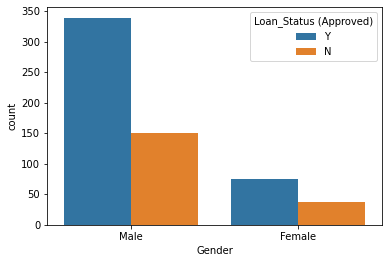

In [124]:
# Distribution of Gender
sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=df1);

In [128]:
## Imputing the missing values with mode
df1.loc[df1['Gender'].isnull()==True,'Gender']='Male'

# confirming the imputation
df1.Gender.isnull().sum()

0

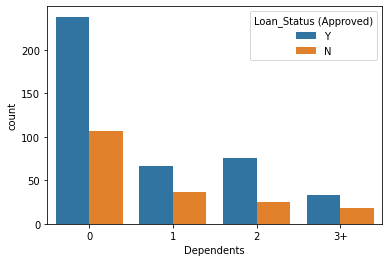

In [127]:
# Plot to show the distribution of the dependants effect on loan status
sns.countplot(x='Dependents',data=df1,hue='Loan_Status (Approved)');

In [129]:
# From the graphical representation it can be seen that as the number of dependents 
#getting increased,
# the chances of approval is less, since we have missing values and if we approve
# loan for them
# it can turn into profit (high chance).Hence we will substitue missing values
#by 0 which also happens to be the mode.
df1.loc[df1['Dependents'].isnull()==True,'Dependents']='0'
# confirming
df1.Dependents.isnull().sum()

0

In [130]:
pd.crosstab(df1['Loan_Status (Approved)'],df1.Dependents)

Dependents,0,1,2,3+
Loan_Status (Approved),,,,
N,113,36,25,18
Y,247,66,76,33


In [131]:
## renaming the target column
df1.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [132]:
# Randomly sample the data
df1.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
565,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,NaN,Rural,Y
522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y


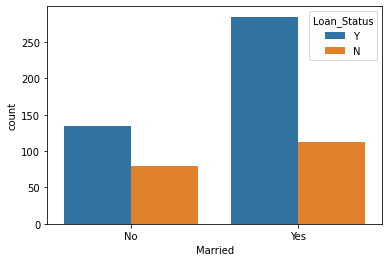

In [133]:
# Plotting the married distribution 
sns.countplot(x='Married',hue='Loan_Status',data=df1);

In [134]:
## Imputing with yes i.e mode
df1.loc[df1['Married'].isnull()==True,'Married']='Yes'

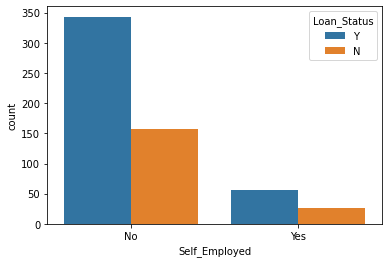

In [135]:
# Plotting the self employment distribution
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df1);

In [136]:
# Replace the missing values with mode
df1.loc[df1['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [137]:
# Replace the missing values in LoanAmount column with median value
df1.loc[df1['LoanAmount'].isnull()==True,'LoanAmount']=np.median(df1.LoanAmount.dropna(axis=0))

In [138]:
# replace the missing values in Loan_Amount_Term with the median value
df1.loc[df1['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(df1.Loan_Amount_Term.dropna(axis=0))

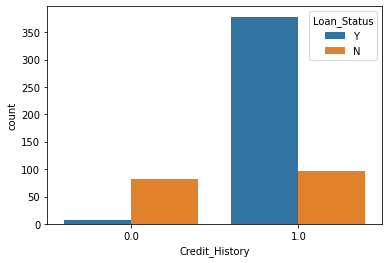

In [139]:
sns.countplot(x='Credit_History',data=df1,hue='Loan_Status');

In [140]:
df1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [141]:
# Replacing missing values for the credit history with the mode which is 1.0
df1.loc[df1['Credit_History'].isnull()==True,'Credit_History']=1.0

In [142]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handling categorical data

In [143]:
## One hot encoding
# Gender
df=pd.get_dummies(df1['Gender'],prefix='Gender',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Gender'],axis=1)
# Married
df=pd.get_dummies(df1['Married'],prefix='Married',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Married'],axis=1)
# Education
df=pd.get_dummies(df1['Education'],prefix='Education',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Education'],axis=1)
# Property area
df=pd.get_dummies(df1['Property_Area'],prefix='Property_Area',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Property_Area'],axis=1)
# Dependents
df=pd.get_dummies(df1['Dependents'],prefix='Dependents',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Dependents'],axis=1)
# Self employed
df=pd.get_dummies(df1['Self_Employed'],prefix='Self_Employed',drop_first=True)
df1=pd.concat([df1,df],axis=1).drop(['Self_Employed'],axis=1)
df1.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [144]:
# Scalling
# Scalling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(df1[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [145]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,342.410423,0.855049,0.817590,0.653094,0.218241,0.379479,0.328990,0.166124,0.164495,0.083062,0.133550
std,0.075560,0.070229,0.121718,64.428629,0.352339,0.386497,0.476373,0.413389,0.485653,0.470229,0.372495,0.371027,0.276201,0.340446
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.045300,0.028524,0.172214,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.069821,0.055134,0.225398,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
## Saving the preprocessed data.
df1.to_csv('Preprocessed_data1.csv',index=False)

In [148]:
# loading data
preprocessed_df1=pd.read_csv('Preprocessed_data1.csv')
preprocessed_df1.head(1)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,0.070489,0.0,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [149]:
# Removing redundant columns
#We can drop loan id.
l1=['Loan_ID']
preprocessed_df1.drop(l1,axis=1,inplace=True)

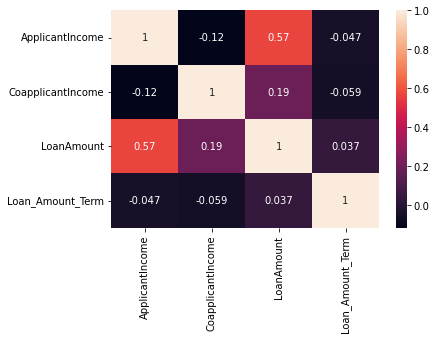

In [150]:
## checking correlation
corr_df1=preprocessed_df1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
sns.heatmap(corr_df1.corr(),annot=True);

### Insights from the correlation table
The fautures have no correlation and thus nothing to exclude from our modeling process.
### Model creation after preprocessing 

In [151]:
# Renaming values for the target column
preprocessed_df1['Loan_Status']=preprocessed_df1['Loan_Status'].map({'Y':1,'N':0})
preprocessed_df1['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [152]:
# Creating the variables
## defining X and y
X=preprocessed_df1.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Self_Employed_Yes']]
y=preprocessed_df1['Loan_Status']

In [153]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [154]:
# Balancing data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [155]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [156]:
# Predict output for X_test
y_pred=svclassifier.predict(X_test)

In [157]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.7857142857142857

In [158]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

Default_class_rep=classification_report(y_test,y_pred)
print(Default_class_rep)

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        33
           1       0.79      0.98      0.88       121

    accuracy                           0.79       154
   macro avg       0.65      0.52      0.49       154
weighted avg       0.73      0.79      0.71       154



In [159]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_pred)
f1

0.8782287822878228

In [160]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,2,31
1,2,119


In [161]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
DefaultCV=scores.mean()
print("Cross validation Score:",DefaultCV)
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.8150289  0.8150289  0.81395349]
Cross validation Score: 0.8146704306134337
Std : 0.0005069547205710685


### Insights from the model created
 Our model has a fair accuracy of 0.79 and f1 score of 0.878. However, it appears that it is bias towards estimating class 1 (Loan approved) where 119 loans are correctly classed. However, it does poorly on class 0 (Loan disapproved) once again with 31 misclassified (False positive) This can lead to huge loss in the bank. Therefore we need to tune our hyperparameters in order to improve the performance of the model. The average  Cross validation score is 0.815. while the standard deviation is 0.000507 
 ### Hyperparameter tuning 1.

In [162]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}

model1=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model1, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 475 candidates, totalling 2375 fits
[CV 1/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=1;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=2;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=3;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state

[CV 5/5] END ..C=0.1, gamma=0.1, random_state=2;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, random_state=3;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, random_state=4;, score=0.816 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, random_state=5;, score=0.817 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=

[CV 3/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, random_state=4;, score=0.816 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.817 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, random_state=5;, score=0.816 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.817 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.812 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, random_state=6;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0

[CV 2/5] END C=0.1, gamma=0.001, random_state=6;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, random_state=6;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, random_state=6;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, random_state=6;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, random_state=7;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, random_state=7;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, random_state=7;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, random_state=7;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, random_state=7;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, random_state=8;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, random_state=8;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, random_state=8;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.

[CV 2/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, random_state=8;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, random_state=9;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, random_state=10;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, random_state=10;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, random_state=10;, score=0.812 total time=   0.0s
[CV 4/5] END 

[CV 3/5] END ......C=1, gamma=1, random_state=9;, score=0.854 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, random_state=9;, score=0.876 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, random_state=9;, score=0.872 total time=   0.0s
[CV 1/5] END .....C=1, gamma=1, random_state=10;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=1, gamma=1, random_state=10;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=1, gamma=1, random_state=10;, score=0.854 total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, random_state=10;, score=0.876 total time=   0.0s
[CV 5/5] END .....C=1, gamma=1, random_state=10;, score=0.872 total time=   0.0s
[CV 1/5] END .....C=1, gamma=1, random_state=11;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=1, gamma=1, random_state=11;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=1, gamma=1, random_state=11;, score=0.854 total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, random_state=11;, score=0.876 total time=   0.0s
[CV 5/5] END .....C=1, gamma

[CV 2/5] END ...C=1, gamma=0.1, random_state=11;, score=0.839 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, random_state=11;, score=0.854 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, random_state=11;, score=0.889 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, random_state=11;, score=0.876 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.1, random_state=12;, score=0.874 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, random_state=12;, score=0.839 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, random_state=12;, score=0.854 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, random_state=12;, score=0.889 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, random_state=12;, score=0.876 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.1, random_state=13;, score=0.874 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, random_state=13;, score=0.839 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, random_state=13;, score=0.854 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0

[CV 1/5] END ..C=1, gamma=0.01, random_state=13;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=13;, score=0.839 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.01, random_state=13;, score=0.828 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, random_state=13;, score=0.816 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, random_state=13;, score=0.812 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, random_state=14;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=14;, score=0.839 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.01, random_state=14;, score=0.828 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, random_state=14;, score=0.816 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, random_state=14;, score=0.812 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, random_state=15;, score=0.816 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, random_state=15;, score=0.839 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.

[CV 5/5] END .C=1, gamma=0.001, random_state=14;, score=0.808 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, random_state=15;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, random_state=15;, score=0.808 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.001, random_state=15;, score=0.812 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, random_state=15;, score=0.816 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, random_state=15;, score=0.808 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, random_state=16;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, random_state=16;, score=0.808 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.001, random_state=16;, score=0.812 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, random_state=16;, score=0.816 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, random_state=16;, score=0.808 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, random_state=17;, score=0.816 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.0

[CV 2/5] END C=1, gamma=0.0001, random_state=16;, score=0.808 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, random_state=16;, score=0.812 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, random_state=16;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, random_state=16;, score=0.808 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, random_state=17;, score=0.816 total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, random_state=17;, score=0.808 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, random_state=17;, score=0.812 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, random_state=17;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, random_state=17;, score=0.808 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, random_state=18;, score=0.816 total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, random_state=18;, score=0.808 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, random_state=18;, score=0.812 total time=   0.0s
[CV 4/5] END C=1, gamma=0.00

[CV 1/5] END ....C=10, gamma=1, random_state=18;, score=0.866 total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, random_state=18;, score=0.825 total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, random_state=18;, score=0.860 total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, random_state=18;, score=0.851 total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, random_state=18;, score=0.856 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, random_state=19;, score=0.866 total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, random_state=19;, score=0.825 total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, random_state=19;, score=0.860 total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, random_state=19;, score=0.851 total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, random_state=19;, score=0.856 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.1, random_state=1;, score=0.868 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.1, random_state=1;, score=0.842 total time=   0.0s
[CV 3/5] END ...C=10, gamma=

[CV 5/5] END ..C=10, gamma=0.1, random_state=19;, score=0.871 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, random_state=1;, score=0.874 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, random_state=1;, score=0.844 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.01, random_state=1;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, random_state=1;, score=0.894 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, random_state=1;, score=0.876 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, random_state=2;, score=0.874 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, random_state=2;, score=0.844 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.01, random_state=2;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, random_state=2;, score=0.894 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, random_state=2;, score=0.876 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, random_state=3;, score=0.874 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0

[CV 5/5] END .C=10, gamma=0.001, random_state=2;, score=0.806 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, random_state=3;, score=0.816 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, random_state=3;, score=0.839 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, random_state=3;, score=0.854 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, random_state=3;, score=0.816 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, random_state=3;, score=0.806 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, random_state=4;, score=0.816 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, random_state=4;, score=0.839 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, random_state=4;, score=0.854 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, random_state=4;, score=0.816 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, random_state=4;, score=0.806 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, random_state=5;, score=0.816 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.

[CV 4/5] END C=10, gamma=0.0001, random_state=4;, score=0.816 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, random_state=4;, score=0.802 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, random_state=5;, score=0.816 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, random_state=5;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, random_state=5;, score=0.812 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, random_state=5;, score=0.816 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, random_state=5;, score=0.802 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, random_state=6;, score=0.816 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, random_state=6;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, random_state=6;, score=0.812 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, random_state=6;, score=0.816 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, random_state=6;, score=0.802 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0

[CV 2/5] END ....C=100, gamma=1, random_state=6;, score=0.800 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, random_state=6;, score=0.835 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, random_state=6;, score=0.821 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, random_state=6;, score=0.843 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, random_state=7;, score=0.820 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, random_state=7;, score=0.800 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, random_state=7;, score=0.835 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, random_state=7;, score=0.821 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, random_state=7;, score=0.843 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, random_state=8;, score=0.820 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, random_state=8;, score=0.800 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, random_state=8;, score=0.835 total time=   0.0s
[CV 4/5] END ....C=100, gamm

[CV 2/5] END ..C=100, gamma=0.1, random_state=8;, score=0.822 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, random_state=8;, score=0.843 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, random_state=8;, score=0.862 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, random_state=8;, score=0.865 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.1, random_state=9;, score=0.856 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, random_state=9;, score=0.822 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, random_state=9;, score=0.843 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, random_state=9;, score=0.862 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, random_state=9;, score=0.865 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.1, random_state=10;, score=0.856 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.1, random_state=10;, score=0.822 total time=   0.0s
[CV 3/5] END .C=100, gamma=0.1, random_state=10;, score=0.843 total time=   0.0s
[CV 4/5] END .C=100, gamma=0

[CV 4/5] END .C=100, gamma=0.01, random_state=9;, score=0.895 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, random_state=9;, score=0.876 total time=   0.0s
[CV 1/5] END C=100, gamma=0.01, random_state=10;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.01, random_state=10;, score=0.854 total time=   0.0s
[CV 3/5] END C=100, gamma=0.01, random_state=10;, score=0.868 total time=   0.0s
[CV 4/5] END C=100, gamma=0.01, random_state=10;, score=0.895 total time=   0.0s
[CV 5/5] END C=100, gamma=0.01, random_state=10;, score=0.876 total time=   0.0s
[CV 1/5] END C=100, gamma=0.01, random_state=11;, score=0.862 total time=   0.0s
[CV 2/5] END C=100, gamma=0.01, random_state=11;, score=0.854 total time=   0.0s
[CV 3/5] END C=100, gamma=0.01, random_state=11;, score=0.868 total time=   0.0s
[CV 4/5] END C=100, gamma=0.01, random_state=11;, score=0.895 total time=   0.0s
[CV 5/5] END C=100, gamma=0.01, random_state=11;, score=0.876 total time=   0.0s
[CV 1/5] END C=100, gamma=0.

[CV 2/5] END C=100, gamma=0.001, random_state=11;, score=0.844 total time=   0.0s
[CV 3/5] END C=100, gamma=0.001, random_state=11;, score=0.863 total time=   0.0s
[CV 4/5] END C=100, gamma=0.001, random_state=11;, score=0.894 total time=   0.0s
[CV 5/5] END C=100, gamma=0.001, random_state=11;, score=0.870 total time=   0.0s
[CV 1/5] END C=100, gamma=0.001, random_state=12;, score=0.874 total time=   0.0s
[CV 2/5] END C=100, gamma=0.001, random_state=12;, score=0.844 total time=   0.0s
[CV 3/5] END C=100, gamma=0.001, random_state=12;, score=0.863 total time=   0.0s
[CV 4/5] END C=100, gamma=0.001, random_state=12;, score=0.894 total time=   0.0s
[CV 5/5] END C=100, gamma=0.001, random_state=12;, score=0.870 total time=   0.0s
[CV 1/5] END C=100, gamma=0.001, random_state=13;, score=0.874 total time=   0.0s
[CV 2/5] END C=100, gamma=0.001, random_state=13;, score=0.844 total time=   0.0s
[CV 3/5] END C=100, gamma=0.001, random_state=13;, score=0.863 total time=   0.0s
[CV 4/5] END C=1

[CV 4/5] END C=100, gamma=0.0001, random_state=12;, score=0.816 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, random_state=12;, score=0.806 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, random_state=13;, score=0.847 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, random_state=13;, score=0.833 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, random_state=13;, score=0.850 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, random_state=13;, score=0.816 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, random_state=13;, score=0.806 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, random_state=14;, score=0.847 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, random_state=14;, score=0.833 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, random_state=14;, score=0.850 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, random_state=14;, score=0.816 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, random_state=14;, score=0.806 total time=   0.0s
[CV 

[CV 1/5] END ..C=1000, gamma=1, random_state=14;, score=0.805 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=1, random_state=14;, score=0.811 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=1, random_state=14;, score=0.813 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=1, random_state=14;, score=0.807 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=1, random_state=14;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=1, random_state=15;, score=0.805 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=1, random_state=15;, score=0.811 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=1, random_state=15;, score=0.813 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=1, random_state=15;, score=0.807 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=1, random_state=15;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=1, random_state=16;, score=0.805 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=1, random_state=16;, score=0.811 total time=   0.0s
[CV 3/5] END ..C=1000, gamma

[CV 4/5] END C=1000, gamma=0.1, random_state=15;, score=0.828 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, random_state=15;, score=0.859 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, random_state=16;, score=0.840 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, random_state=16;, score=0.811 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, random_state=16;, score=0.844 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.1, random_state=16;, score=0.828 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, random_state=16;, score=0.859 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, random_state=17;, score=0.840 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, random_state=17;, score=0.811 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, random_state=17;, score=0.844 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.1, random_state=17;, score=0.828 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, random_state=17;, score=0.859 total time=   0.0s
[CV 1/5] END C=1000, gamma=0

[CV 5/5] END C=1000, gamma=0.01, random_state=16;, score=0.870 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.01, random_state=17;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.01, random_state=17;, score=0.842 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.01, random_state=17;, score=0.868 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.01, random_state=17;, score=0.890 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, random_state=17;, score=0.870 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.01, random_state=18;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.01, random_state=18;, score=0.842 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.01, random_state=18;, score=0.868 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.01, random_state=18;, score=0.890 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, random_state=18;, score=0.870 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.01, random_state=19;, score=0.862 total time=   0.1s
[CV 2/5] END C=1

[CV 5/5] END C=1000, gamma=0.001, random_state=17;, score=0.870 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, random_state=18;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.001, random_state=18;, score=0.854 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.001, random_state=18;, score=0.868 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, random_state=18;, score=0.895 total time=   0.1s
[CV 5/5] END C=1000, gamma=0.001, random_state=18;, score=0.870 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, random_state=19;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.001, random_state=19;, score=0.854 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, random_state=19;, score=0.868 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, random_state=19;, score=0.895 total time=   0.1s
[CV 5/5] END C=1000, gamma=0.001, random_state=19;, score=0.870 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, random_state=1;, score=0.872 total time=   0.0s
[CV 

[CV 4/5] END C=1000, gamma=0.0001, random_state=18;, score=0.898 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, random_state=18;, score=0.870 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, random_state=19;, score=0.872 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, random_state=19;, score=0.836 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.0001, random_state=19;, score=0.859 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.0001, random_state=19;, score=0.898 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, random_state=19;, score=0.870 total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=3)

In [163]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'random_state': 1}
SVC(C=100, gamma=0.01, random_state=1)


In [164]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator
clf=SVC(C=100, gamma=0.01,random_state=1) 

In [165]:
#Fitting the estimator into the previously balanced data
clf.fit(X_smote, y_smote)

SVC(C=100, gamma=0.01, random_state=1)

In [166]:
# Predicting phase
y_pred1=clf.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [167]:
# Classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.86      0.95      0.90       121

    accuracy                           0.84       154
   macro avg       0.78      0.69      0.72       154
weighted avg       0.82      0.84      0.82       154



In [168]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Loan_Status,,
0,14,19
1,6,115


In [169]:
f=f1_score(y_test,y_pred1)
f

0.9019607843137255

In [170]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
Default1=scores_after.mean()
print("Cross validation Score:",Default1)
print("Std :",scores_after.std())
#std of < 0.05 is good. 

[0.84516129 0.87421384 0.87868852]
Cross validation Score: 0.866021217130244
Std : 0.014862887073538073


### Insights from hyperparameter tuning phase 1
- The accuracy as well as the f1 score have improved accuracy score from 0.79 to 0.84 and f1 score from 0.878 to 0.902. It is also evident that the average Cross Validation score has improved from 0.815 to 0.866 and its standard deviation from 0.000507 to 0.014 with the best hyperparameters tuned above, C=100, gammar=0.01 and random =1, but we still need to tune further. The cross validation.

### Hyperparameter tuning phase 2 after re-preprocessing

In [171]:
from sklearn.model_selection import GridSearchCV #c-,gammar- for 2
  
# defining phase 2 parameter  range
param_grid = {'C': [90, 150, 200, 500, 1000],
              'gamma': [0.009, 0.02, 0.05, 0.08, 0.2],
             'random_state':(list(range(2, 10)))}

model2=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model2, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END .C=90, gamma=0.009, random_state=2;, score=0.862 total time=   0.0s
[CV 2/5] END .C=90, gamma=0.009, random_state=2;, score=0.854 total time=   0.0s
[CV 3/5] END .C=90, gamma=0.009, random_state=2;, score=0.868 total time=   0.0s
[CV 4/5] END .C=90, gamma=0.009, random_state=2;, score=0.895 total time=   0.0s
[CV 5/5] END .C=90, gamma=0.009, random_state=2;, score=0.876 total time=   0.0s
[CV 1/5] END .C=90, gamma=0.009, random_state=3;, score=0.862 total time=   0.0s
[CV 2/5] END .C=90, gamma=0.009, random_state=3;, score=0.854 total time=   0.0s
[CV 3/5] END .C=90, gamma=0.009, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END .C=90, gamma=0.009, random_state=3;, score=0.895 total time=   0.0s
[CV 5/5] END .C=90, gamma=0.009, random_state=3;, score=0.876 total time=   0.0s
[CV 1/5] END .C=90, gamma=0.009, random_state=4;, score=0.862 total time=   0.0s
[CV 2/5] END .C=90, gamma=0.009, random_state

[CV 3/5] END ..C=90, gamma=0.05, random_state=6;, score=0.868 total time=   0.0s
[CV 4/5] END ..C=90, gamma=0.05, random_state=6;, score=0.884 total time=   0.0s
[CV 5/5] END ..C=90, gamma=0.05, random_state=6;, score=0.870 total time=   0.0s
[CV 1/5] END ..C=90, gamma=0.05, random_state=7;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=90, gamma=0.05, random_state=7;, score=0.836 total time=   0.0s
[CV 3/5] END ..C=90, gamma=0.05, random_state=7;, score=0.868 total time=   0.0s
[CV 4/5] END ..C=90, gamma=0.05, random_state=7;, score=0.884 total time=   0.0s
[CV 5/5] END ..C=90, gamma=0.05, random_state=7;, score=0.870 total time=   0.0s
[CV 1/5] END ..C=90, gamma=0.05, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END ..C=90, gamma=0.05, random_state=8;, score=0.836 total time=   0.0s
[CV 3/5] END ..C=90, gamma=0.05, random_state=8;, score=0.868 total time=   0.0s
[CV 4/5] END ..C=90, gamma=0.05, random_state=8;, score=0.884 total time=   0.0s
[CV 5/5] END ..C=90, gamma=0

[CV 1/5] END C=150, gamma=0.009, random_state=3;, score=0.862 total time=   0.0s
[CV 2/5] END C=150, gamma=0.009, random_state=3;, score=0.854 total time=   0.0s
[CV 3/5] END C=150, gamma=0.009, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END C=150, gamma=0.009, random_state=3;, score=0.890 total time=   0.0s
[CV 5/5] END C=150, gamma=0.009, random_state=3;, score=0.870 total time=   0.1s
[CV 1/5] END C=150, gamma=0.009, random_state=4;, score=0.862 total time=   0.0s
[CV 2/5] END C=150, gamma=0.009, random_state=4;, score=0.854 total time=   0.0s
[CV 3/5] END C=150, gamma=0.009, random_state=4;, score=0.868 total time=   0.0s
[CV 4/5] END C=150, gamma=0.009, random_state=4;, score=0.890 total time=   0.0s
[CV 5/5] END C=150, gamma=0.009, random_state=4;, score=0.870 total time=   0.0s
[CV 1/5] END C=150, gamma=0.009, random_state=5;, score=0.862 total time=   0.0s
[CV 2/5] END C=150, gamma=0.009, random_state=5;, score=0.854 total time=   0.0s
[CV 3/5] END C=150, gamma=0.

[CV 5/5] END .C=150, gamma=0.05, random_state=7;, score=0.870 total time=   0.0s
[CV 1/5] END .C=150, gamma=0.05, random_state=8;, score=0.862 total time=   0.0s
[CV 2/5] END .C=150, gamma=0.05, random_state=8;, score=0.834 total time=   0.0s
[CV 3/5] END .C=150, gamma=0.05, random_state=8;, score=0.862 total time=   0.0s
[CV 4/5] END .C=150, gamma=0.05, random_state=8;, score=0.889 total time=   0.0s
[CV 5/5] END .C=150, gamma=0.05, random_state=8;, score=0.870 total time=   0.0s
[CV 1/5] END .C=150, gamma=0.05, random_state=9;, score=0.862 total time=   0.0s
[CV 2/5] END .C=150, gamma=0.05, random_state=9;, score=0.834 total time=   0.0s
[CV 3/5] END .C=150, gamma=0.05, random_state=9;, score=0.862 total time=   0.0s
[CV 4/5] END .C=150, gamma=0.05, random_state=9;, score=0.889 total time=   0.0s
[CV 5/5] END .C=150, gamma=0.05, random_state=9;, score=0.870 total time=   0.0s
[CV 1/5] END .C=150, gamma=0.08, random_state=2;, score=0.856 total time=   0.0s
[CV 2/5] END .C=150, gamma=0

[CV 3/5] END C=200, gamma=0.009, random_state=4;, score=0.868 total time=   0.0s
[CV 4/5] END C=200, gamma=0.009, random_state=4;, score=0.890 total time=   0.0s
[CV 5/5] END C=200, gamma=0.009, random_state=4;, score=0.870 total time=   0.1s
[CV 1/5] END C=200, gamma=0.009, random_state=5;, score=0.862 total time=   0.0s
[CV 2/5] END C=200, gamma=0.009, random_state=5;, score=0.854 total time=   0.0s
[CV 3/5] END C=200, gamma=0.009, random_state=5;, score=0.868 total time=   0.0s
[CV 4/5] END C=200, gamma=0.009, random_state=5;, score=0.890 total time=   0.0s
[CV 5/5] END C=200, gamma=0.009, random_state=5;, score=0.870 total time=   0.1s
[CV 1/5] END C=200, gamma=0.009, random_state=6;, score=0.862 total time=   0.0s
[CV 2/5] END C=200, gamma=0.009, random_state=6;, score=0.854 total time=   0.0s
[CV 3/5] END C=200, gamma=0.009, random_state=6;, score=0.868 total time=   0.0s
[CV 4/5] END C=200, gamma=0.009, random_state=6;, score=0.890 total time=   0.0s
[CV 5/5] END C=200, gamma=0.

[CV 1/5] END .C=200, gamma=0.05, random_state=9;, score=0.856 total time=   0.0s
[CV 2/5] END .C=200, gamma=0.05, random_state=9;, score=0.834 total time=   0.0s
[CV 3/5] END .C=200, gamma=0.05, random_state=9;, score=0.862 total time=   0.0s
[CV 4/5] END .C=200, gamma=0.05, random_state=9;, score=0.876 total time=   0.0s
[CV 5/5] END .C=200, gamma=0.05, random_state=9;, score=0.870 total time=   0.0s
[CV 1/5] END .C=200, gamma=0.08, random_state=2;, score=0.849 total time=   0.0s
[CV 2/5] END .C=200, gamma=0.08, random_state=2;, score=0.822 total time=   0.0s
[CV 3/5] END .C=200, gamma=0.08, random_state=2;, score=0.843 total time=   0.0s
[CV 4/5] END .C=200, gamma=0.08, random_state=2;, score=0.862 total time=   0.0s
[CV 5/5] END .C=200, gamma=0.08, random_state=2;, score=0.865 total time=   0.0s
[CV 1/5] END .C=200, gamma=0.08, random_state=3;, score=0.849 total time=   0.0s
[CV 2/5] END .C=200, gamma=0.08, random_state=3;, score=0.822 total time=   0.0s
[CV 3/5] END .C=200, gamma=0

[CV 4/5] END C=500, gamma=0.009, random_state=5;, score=0.890 total time=   0.0s
[CV 5/5] END C=500, gamma=0.009, random_state=5;, score=0.870 total time=   0.1s
[CV 1/5] END C=500, gamma=0.009, random_state=6;, score=0.868 total time=   0.1s
[CV 2/5] END C=500, gamma=0.009, random_state=6;, score=0.854 total time=   0.0s
[CV 3/5] END C=500, gamma=0.009, random_state=6;, score=0.868 total time=   0.0s
[CV 4/5] END C=500, gamma=0.009, random_state=6;, score=0.890 total time=   0.0s
[CV 5/5] END C=500, gamma=0.009, random_state=6;, score=0.870 total time=   0.1s
[CV 1/5] END C=500, gamma=0.009, random_state=7;, score=0.868 total time=   0.1s
[CV 2/5] END C=500, gamma=0.009, random_state=7;, score=0.854 total time=   0.0s
[CV 3/5] END C=500, gamma=0.009, random_state=7;, score=0.868 total time=   0.0s
[CV 4/5] END C=500, gamma=0.009, random_state=7;, score=0.890 total time=   0.0s
[CV 5/5] END C=500, gamma=0.009, random_state=7;, score=0.870 total time=   0.1s
[CV 1/5] END C=500, gamma=0.

[CV 1/5] END .C=500, gamma=0.08, random_state=2;, score=0.846 total time=   0.0s
[CV 2/5] END .C=500, gamma=0.08, random_state=2;, score=0.815 total time=   0.0s
[CV 3/5] END .C=500, gamma=0.08, random_state=2;, score=0.846 total time=   0.0s
[CV 4/5] END .C=500, gamma=0.08, random_state=2;, score=0.842 total time=   0.0s
[CV 5/5] END .C=500, gamma=0.08, random_state=2;, score=0.865 total time=   0.0s
[CV 1/5] END .C=500, gamma=0.08, random_state=3;, score=0.846 total time=   0.0s
[CV 2/5] END .C=500, gamma=0.08, random_state=3;, score=0.815 total time=   0.0s
[CV 3/5] END .C=500, gamma=0.08, random_state=3;, score=0.846 total time=   0.0s
[CV 4/5] END .C=500, gamma=0.08, random_state=3;, score=0.842 total time=   0.0s
[CV 5/5] END .C=500, gamma=0.08, random_state=3;, score=0.865 total time=   0.0s
[CV 1/5] END .C=500, gamma=0.08, random_state=4;, score=0.846 total time=   0.0s
[CV 2/5] END .C=500, gamma=0.08, random_state=4;, score=0.815 total time=   0.0s
[CV 3/5] END .C=500, gamma=0

[CV 2/5] END C=1000, gamma=0.009, random_state=6;, score=0.842 total time=   0.2s
[CV 3/5] END C=1000, gamma=0.009, random_state=6;, score=0.868 total time=   0.2s
[CV 4/5] END C=1000, gamma=0.009, random_state=6;, score=0.890 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.009, random_state=6;, score=0.870 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.009, random_state=7;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.009, random_state=7;, score=0.842 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.009, random_state=7;, score=0.868 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.009, random_state=7;, score=0.890 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.009, random_state=7;, score=0.870 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.009, random_state=8;, score=0.862 total time=   0.1s
[CV 2/5] END C=1000, gamma=0.009, random_state=8;, score=0.842 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.009, random_state=8;, score=0.868 total time=   0.1s
[CV 4/5] END C=1

[CV 3/5] END C=1000, gamma=0.08, random_state=2;, score=0.844 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.08, random_state=2;, score=0.832 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.08, random_state=2;, score=0.859 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.08, random_state=3;, score=0.840 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.08, random_state=3;, score=0.811 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.08, random_state=3;, score=0.844 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.08, random_state=3;, score=0.832 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.08, random_state=3;, score=0.859 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.08, random_state=4;, score=0.840 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.08, random_state=4;, score=0.811 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.08, random_state=4;, score=0.844 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.08, random_state=4;, score=0.832 total time=   0.0s
[CV 5/5] END C=1000, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [90, 150, 200, 500, 1000],
                         'gamma': [0.009, 0.02, 0.05, 0.08, 0.2],
                         'random_state': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1', verbose=3)

In [172]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 90, 'gamma': 0.009, 'random_state': 2}
SVC(C=90, gamma=0.009, random_state=2)


In [173]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator the second time
clf2=SVC(C=90, gamma=0.009,random_state=2) 

#Fitting the estimator into the previously balanced data
clf2.fit(X_smote, y_smote)

SVC(C=90, gamma=0.009, random_state=2)

In [174]:
# Predicting phase
y_pred2=clf2.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [175]:
# Classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.86      0.95      0.90       121

    accuracy                           0.84       154
   macro avg       0.78      0.69      0.72       154
weighted avg       0.82      0.84      0.82       154



In [176]:
pd.crosstab(y_test,y_pred2)

col_0,0,1
Loan_Status,,
0,14,19
1,6,115


In [184]:
f3=f1_score(y_test,y_pred3)
f3

0.8984375000000001

In [177]:
scores_after2 = cross_val_score(clf2,X,y,cv=3,scoring='f1')
print(scores_after2)
Default2=scores_after2.mean()
print("Cross validation Score:",Default2)
print("Std :",scores_after2.std())
#std of < 0.05 is good. 

[0.8488746  0.87697161 0.875     ]
Cross validation Score: 0.8669487356345158
Std : 0.01280566663247507


### Insights from hyperparameter tuning phase 2
The accuracy has remained at 0.84 as well as the f1 score has reduced from 0.902 to 0.898. However, it is evident that the Cross Validation score has maintained at 0.866 with the best hyperparameters tuned above, C=90, gammar=0.009 and random =2, but we still need to tune further.
### Hyperparameter tuning 3|

In [185]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter phase 2 range
param_grid = {'C': [91, 95, 98, 102, 105],
              'gamma': [0.005, 0.007, 0.015, 0.016, 0.018],
             'random_state':(list(range(1, 5)))}

model3=SVC()# create  a new model since there is another one above that was used
grid = GridSearchCV(model3, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .C=91, gamma=0.005, random_state=1;, score=0.872 total time=   0.0s
[CV 2/5] END .C=91, gamma=0.005, random_state=1;, score=0.842 total time=   0.0s
[CV 3/5] END .C=91, gamma=0.005, random_state=1;, score=0.868 total time=   0.0s
[CV 4/5] END .C=91, gamma=0.005, random_state=1;, score=0.886 total time=   0.0s
[CV 5/5] END .C=91, gamma=0.005, random_state=1;, score=0.871 total time=   0.0s
[CV 1/5] END .C=91, gamma=0.005, random_state=2;, score=0.872 total time=   0.0s
[CV 2/5] END .C=91, gamma=0.005, random_state=2;, score=0.842 total time=   0.0s
[CV 3/5] END .C=91, gamma=0.005, random_state=2;, score=0.868 total time=   0.0s
[CV 4/5] END .C=91, gamma=0.005, random_state=2;, score=0.886 total time=   0.0s
[CV 5/5] END .C=91, gamma=0.005, random_state=2;, score=0.871 total time=   0.0s
[CV 1/5] END .C=91, gamma=0.005, random_state=3;, score=0.872 total time=   0.0s
[CV 2/5] END .C=91, gamma=0.005, random_state=

[CV 3/5] END .C=95, gamma=0.005, random_state=1;, score=0.868 total time=   0.0s
[CV 4/5] END .C=95, gamma=0.005, random_state=1;, score=0.896 total time=   0.0s
[CV 5/5] END .C=95, gamma=0.005, random_state=1;, score=0.871 total time=   0.0s
[CV 1/5] END .C=95, gamma=0.005, random_state=2;, score=0.872 total time=   0.0s
[CV 2/5] END .C=95, gamma=0.005, random_state=2;, score=0.842 total time=   0.0s
[CV 3/5] END .C=95, gamma=0.005, random_state=2;, score=0.868 total time=   0.0s
[CV 4/5] END .C=95, gamma=0.005, random_state=2;, score=0.896 total time=   0.0s
[CV 5/5] END .C=95, gamma=0.005, random_state=2;, score=0.871 total time=   0.0s
[CV 1/5] END .C=95, gamma=0.005, random_state=3;, score=0.872 total time=   0.0s
[CV 2/5] END .C=95, gamma=0.005, random_state=3;, score=0.842 total time=   0.0s
[CV 3/5] END .C=95, gamma=0.005, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END .C=95, gamma=0.005, random_state=3;, score=0.896 total time=   0.0s
[CV 5/5] END .C=95, gamma=0.

[CV 2/5] END .C=98, gamma=0.005, random_state=2;, score=0.842 total time=   0.0s
[CV 3/5] END .C=98, gamma=0.005, random_state=2;, score=0.868 total time=   0.0s
[CV 4/5] END .C=98, gamma=0.005, random_state=2;, score=0.896 total time=   0.0s
[CV 5/5] END .C=98, gamma=0.005, random_state=2;, score=0.871 total time=   0.0s
[CV 1/5] END .C=98, gamma=0.005, random_state=3;, score=0.872 total time=   0.0s
[CV 2/5] END .C=98, gamma=0.005, random_state=3;, score=0.842 total time=   0.0s
[CV 3/5] END .C=98, gamma=0.005, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END .C=98, gamma=0.005, random_state=3;, score=0.896 total time=   0.0s
[CV 5/5] END .C=98, gamma=0.005, random_state=3;, score=0.871 total time=   0.0s
[CV 1/5] END .C=98, gamma=0.005, random_state=4;, score=0.872 total time=   0.0s
[CV 2/5] END .C=98, gamma=0.005, random_state=4;, score=0.842 total time=   0.0s
[CV 3/5] END .C=98, gamma=0.005, random_state=4;, score=0.868 total time=   0.0s
[CV 4/5] END .C=98, gamma=0.

[CV 5/5] END C=102, gamma=0.005, random_state=2;, score=0.871 total time=   0.0s
[CV 1/5] END C=102, gamma=0.005, random_state=3;, score=0.872 total time=   0.0s
[CV 2/5] END C=102, gamma=0.005, random_state=3;, score=0.842 total time=   0.0s
[CV 3/5] END C=102, gamma=0.005, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END C=102, gamma=0.005, random_state=3;, score=0.896 total time=   0.0s
[CV 5/5] END C=102, gamma=0.005, random_state=3;, score=0.871 total time=   0.0s
[CV 1/5] END C=102, gamma=0.005, random_state=4;, score=0.872 total time=   0.0s
[CV 2/5] END C=102, gamma=0.005, random_state=4;, score=0.842 total time=   0.0s
[CV 3/5] END C=102, gamma=0.005, random_state=4;, score=0.868 total time=   0.0s
[CV 4/5] END C=102, gamma=0.005, random_state=4;, score=0.896 total time=   0.0s
[CV 5/5] END C=102, gamma=0.005, random_state=4;, score=0.871 total time=   0.0s
[CV 1/5] END C=102, gamma=0.007, random_state=1;, score=0.862 total time=   0.0s
[CV 2/5] END C=102, gamma=0.

[CV 3/5] END C=105, gamma=0.005, random_state=3;, score=0.868 total time=   0.0s
[CV 4/5] END C=105, gamma=0.005, random_state=3;, score=0.896 total time=   0.0s
[CV 5/5] END C=105, gamma=0.005, random_state=3;, score=0.871 total time=   0.0s
[CV 1/5] END C=105, gamma=0.005, random_state=4;, score=0.872 total time=   0.0s
[CV 2/5] END C=105, gamma=0.005, random_state=4;, score=0.842 total time=   0.0s
[CV 3/5] END C=105, gamma=0.005, random_state=4;, score=0.868 total time=   0.0s
[CV 4/5] END C=105, gamma=0.005, random_state=4;, score=0.896 total time=   0.0s
[CV 5/5] END C=105, gamma=0.005, random_state=4;, score=0.871 total time=   0.0s
[CV 1/5] END C=105, gamma=0.007, random_state=1;, score=0.862 total time=   0.0s
[CV 2/5] END C=105, gamma=0.007, random_state=1;, score=0.854 total time=   0.0s
[CV 3/5] END C=105, gamma=0.007, random_state=1;, score=0.868 total time=   0.0s
[CV 4/5] END C=105, gamma=0.007, random_state=1;, score=0.895 total time=   0.0s
[CV 5/5] END C=105, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [91, 95, 98, 102, 105],
                         'gamma': [0.005, 0.007, 0.015, 0.016, 0.018],
                         'random_state': [1, 2, 3, 4]},
             scoring='f1', verbose=3)

In [186]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 91, 'gamma': 0.007, 'random_state': 1}
SVC(C=91, gamma=0.007, random_state=1)


In [188]:
#Using the best values for the hyperparameters from the searchgridCv to tune our estimator the second time
clf3=SVC(C=91, gamma=0.007,random_state=1) 

#Fitting the estimator into the previously balanced data
clf3.fit(X_smote, y_smote)

SVC(C=91, gamma=0.007, random_state=1)

In [189]:
# Predicting phase
y_pred3=clf3.predict(X_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [190]:
# Classification report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.86      0.95      0.90       121

    accuracy                           0.84       154
   macro avg       0.78      0.69      0.72       154
weighted avg       0.82      0.84      0.82       154



In [191]:
pd.crosstab(y_test,y_pred3)

col_0,0,1
Loan_Status,,
0,14,19
1,6,115


In [194]:
f3=f1_score(y_test,y_pred3)
f3_=recall_score(y_test,y_pred3)
print(f3,'\n',f3_)

0.9019607843137255 
 0.9504132231404959


In [193]:
scores_after3 = cross_val_score(clf3,X,y,cv=3,scoring='f1')
print(scores_after3)
Default3=scores_after3.mean()
print("Cross validation Score:",Default3)
print("Std :",scores_after3.std())
#std of < 0.05 is good.

[0.8488746  0.87341772 0.87788779]
Cross validation Score: 0.8667267027895349
Std : 0.012754570618543295


### Insights from hyperparameter tuning phase 2
The accuracy has remained at 0.84 while the f1 score has increased from 0.898 to 0.902. However, it is evident that the Cross Validation score has maintained at 0.866 and a standard deviation of 0.012 with the best hyperparameters tuned above, C=91, gammar=0.007 and random =1.

## Conclusion 
* From the hypeparameter tuning done above, we can see the model has improved when the hypeparameters are tuned at C=91, gammar=0.007 and random=1. with accuracy of 84%, and f1 score of 0.91 and a recall score of 0.95. 
* The issue is especially with increase Type 1 Error (False Positive). This may result to bank giving loans to clients who are not qualified for loan approval and lead to huge losses. 
* For better performance we may need to do some other prerocessing especially on the scalling technique we use either Robust or standard technique or we use a different technique in encoding like map encodding.